In [1]:
import pandas as pd

# Creating a variable to initially read in dataset for project.
eegDatasetCleaned = pd.read_csv('../eegDatasetCleanedForModel.csv')

In [2]:
# Observing cleaned EEG dataset and prints the first 5 rows.
print('\n EEG DATA SET HEAD, \n----------------------------------------------------\n')
print(eegDatasetCleaned.head(5))


 EEG DATA SET HEAD, 
----------------------------------------------------

     specific.disorder  AB.A.delta.a.FP1  AB.A.delta.b.FP2  AB.A.delta.c.F7  \
0  acuteStressDisorder         30.323572         29.558049        25.293659   
1  acuteStressDisorder         23.327612         34.845856        26.757280   
2  acuteStressDisorder         17.252066         15.155292        16.108600   
3  acuteStressDisorder         34.912317         39.136562        34.103989   
4  acuteStressDisorder          8.520262          9.073504        10.481318   

   AB.A.delta.d.F3  AB.A.delta.e.Fz  AB.A.delta.f.F4  AB.A.delta.g.F8  \
0        25.431386        27.157943        26.064096        26.962306   
1        17.888937        18.073537        17.885986        19.711728   
2        18.438291        27.098033        19.733524        11.736709   
3        36.462923        37.904649        42.758987        38.002407   
4        16.898775        11.355207        10.495163        10.468839   

   AB.A.de

In [3]:
# Prints information about the EEG dataset.
eegDatasetCleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Columns: 1141 entries, specific.disorder to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140), object(1)
memory usage: 8.2+ MB


In [4]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG DATA SET SHAPE,\n----------------------------------------------------\n')
print('EEG dataset shape: \n', eegDatasetCleaned.shape)


 EEG DATA SET SHAPE,
----------------------------------------------------

EEG dataset shape: 
 (945, 1141)


In [5]:
# Checks data for missing values and spits a sum of entries missing
print('\n EEG DATA SET CHECK FOR MISSING ENTRIES, \n----------------------------------------------------\n')
print('Number of missing entries: ', eegDatasetCleaned.isnull().sum())


 EEG DATA SET CHECK FOR MISSING ENTRIES, 
----------------------------------------------------

Number of missing entries:  specific.disorder        0
AB.A.delta.a.FP1         0
AB.A.delta.b.FP2         0
AB.A.delta.c.F7          0
AB.A.delta.d.F3          0
                        ..
COH.F.gamma.p.P4.r.O1    0
COH.F.gamma.p.P4.s.O2    0
COH.F.gamma.q.T6.r.O1    0
COH.F.gamma.q.T6.s.O2    0
COH.F.gamma.r.O1.s.O2    0
Length: 1141, dtype: int64


In [6]:
# To observe the range of disorders available in the data the following code is used.
eegDatasetCleaned['specific.disorder'].unique()

array(['acuteStressDisorder', 'adjustmentDisorder', 'alcoholUseDisorder',
       'behavioralAddictionDisorder', 'bipolarDisorder',
       'depressiveDisorder', 'healthyControl',
       'obsessiveCompulsiveDisorder', 'panicDisorder',
       'posttraumaticStressDisorder', 'schizophrenia',
       'socialAnxietyDisorder'], dtype=object)

In [7]:
# Counts the number of each disorder recorded.
disorderOccurrence = eegDatasetCleaned.groupby(['specific.disorder']).size()
print('\n EEG DISORDER OCCURRENCES COUNT, \n----------------------------------------------------\n')
print(disorderOccurrence)


 EEG DISORDER OCCURRENCES COUNT, 
----------------------------------------------------

specific.disorder
acuteStressDisorder             38
adjustmentDisorder              38
alcoholUseDisorder              93
behavioralAddictionDisorder     93
bipolarDisorder                 67
depressiveDisorder             199
healthyControl                  95
obsessiveCompulsiveDisorder     46
panicDisorder                   59
posttraumaticStressDisorder     52
schizophrenia                  117
socialAnxietyDisorder           48
dtype: int64


<AxesSubplot:>

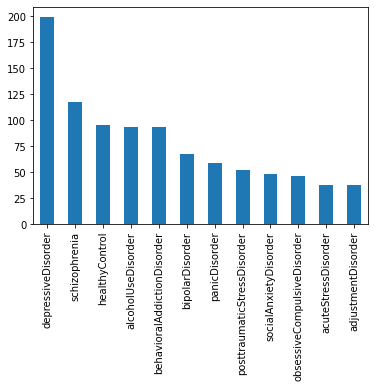

In [8]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot(kind='bar')

<AxesSubplot:ylabel='specific.disorder'>

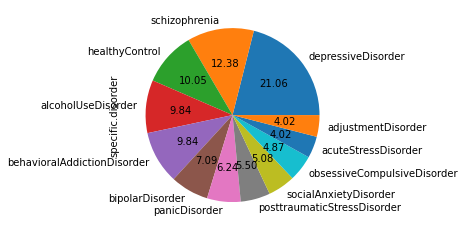

In [9]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [10]:
# As the model is only able to handle numeric data I had to convert the strings into integers so they could be processed.
# With the disorders converted to integers I next replaced the current strings with the new updated integer values.
eegDatasetCleaned['specific.disorder'] = eegDatasetCleaned['specific.disorder'].replace({
    'acuteStressDisorder':1, 
    'adjustmentDisorder':2, 
    'alcoholUseDisorder':3,
    'behavioralAddictionDisorder':4, 
    'bipolarDisorder':5,
    'depressiveDisorder':6, 
    'healthyControl':7,
    'obsessiveCompulsiveDisorder':8, 
    'panicDisorder':9,
    'posttraumaticStressDisorder':10, 
    'schizophrenia':11,
    'socialAnxietyDisorder':12
})

In [11]:
eegDatasetCleaned

,specific.disorder,AB.A.delta.a.FP1,AB.A.delta.b.FP2,AB.A.delta.c.F7,AB.A.delta.d.F3,AB.A.delta.e.Fz,AB.A.delta.f.F4,AB.A.delta.g.F8,AB.A.delta.h.T3,AB.A.delta.i.C3,...,COH.F.gamma.o.Pz.p.P4,COH.F.gamma.o.Pz.q.T6,COH.F.gamma.o.Pz.r.O1,COH.F.gamma.o.Pz.s.O2,COH.F.gamma.p.P4.q.T6,COH.F.gamma.p.P4.r.O1,COH.F.gamma.p.P4.s.O2,COH.F.gamma.q.T6.r.O1,COH.F.gamma.q.T6.s.O2,COH.F.gamma.r.O1.s.O2
0,1,30.323572,29.558049,25.293659,25.431386,27.157943,26.064096,26.962306,16.140803,17.928469,...,55.989192,16.739679,23.452271,45.678820,30.167520,16.918761,48.850427,9.422630,34.507082,28.613029
1,1,23.327612,34.845856,26.757280,17.888937,18.073537,17.885986,19.711728,8.810296,16.205385,...,45.595619,17.510824,26.777368,28.201062,57.108861,32.375401,60.351749,13.900981,57.831848,43.463261
2,1,17.252066,15.155292,16.108600,18.438291,27.098033,19.733524,11.736709,11.327534,17.173299,...,99.475453,70.654171,39.131547,69.920996,71.063644,38.534505,69.908764,27.180532,64.803155,31.485799
3,1,34.912317,39.136562,34.103989,36.462923,37.904649,42.758987,38.002407,26.303330,32.681753,...,59.986561,63.822201,36.478254,47.117006,84.658376,24.724096,50.299349,35.319695,79.822944,41.141873
4,1,8.520262,9.073504,10.481318,16.898775,11.355207,10.495163,10.468839,9.622323,10.772125,...,61.462720,59.166097,51.465531,58.635415,80.685608,62.138436,75.888749,61.003944,87.455509,70.531662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,12,17.585491,16.912154,16.676674,16.432607,12.560949,12.451371,12.126499,10.044354,9.446693,...,82.905657,34.850706,63.970519,63.982003,51.244725,62.203684,62.062237,31.013031,31.183413,98.325230
941,12,21.393045,23.018120,21.406082,22.840180,18.802283,19.366903,25.692413,10.097856,14.600330,...,65.917918,66.700117,44.756285,49.787513,98.905995,54.021304,93.902401,52.740396,92.807331,56.320868
942,12,19.543898,18.035856,20.696263,17.510941,19.099672,16.940304,15.605748,9.916546,15.404386,...,61.040959,27.632209,45.552852,33.638817,46.690983,19.382928,41.050717,7.045821,41.962451,19.092111
943,12,11.581630,16.528605,12.079624,19.150356,11.189703,10.523212,8.997941,5.713006,9.971759,...,99.113664,48.328934,41.248470,28.192238,48.665743,42.007147,28.735945,27.176500,27.529522,20.028446


In [12]:
# Generating a correlation matrix
corr = eegDatasetCleaned.corr()

<AxesSubplot:>

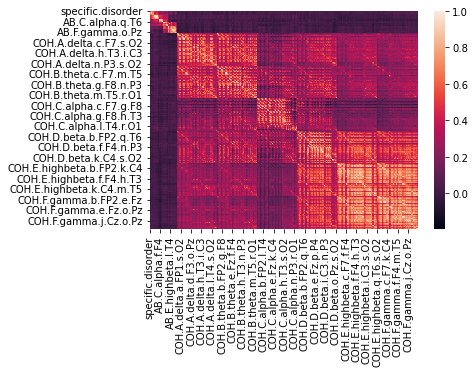

In [13]:
import seaborn as sns

# Generating a correlation heatmap to visually observe best correlations
sns.heatmap(corr)

In [14]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithOutDisorder = eegDatasetCleaned.loc[:, eegDatasetCleaned.columns != 'specific.disorder']

In [15]:
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

# Handling Imbalanced Dataset
# SMOTE (Synthetic Minority Oversampling Technique) will be used as it helps with oversampling the examples
# in the minority class.

# Select random data from the minority class.
# Calculate the Euclidean distance between the random data and its k nearest neighbors.
# Multiply the difference with a random number between 0 and 1. Then, add the result to the minority class as a synthetic sample.
# Repeat the procedure until the expected proportion of minority class is met.

# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
xSmote, ySmote = resample.fit_resample(eegTrainingDataWithOutDisorder, eegDatasetCleaned['specific.disorder'])

In [16]:
# Prints information about the EEG training smote dataset.
xSmote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2388 entries, 0 to 2387
Columns: 1140 entries, AB.A.delta.a.FP1 to COH.F.gamma.r.O1.s.O2
dtypes: float64(1140)
memory usage: 20.8 MB


In [17]:
# Prints information about the EEG true smote dataset.
ySmote.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2388 entries, 0 to 2387
Series name: specific.disorder
Non-Null Count  Dtype
--------------  -----
2388 non-null   int64
dtypes: int64(1)
memory usage: 18.8 KB


In [18]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRAINING DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG training dataset shape after smote: \n', xSmote.shape)


 EEG TRAINING DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG training dataset shape after smote: 
 (2388, 1140)


In [19]:
# Checks the shape of the dataset (prints number of rows and columns).
print('\n EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,\n----------------------------------------------------\n')
print('EEG true value dataset shape after smote: \n', ySmote.shape)


 EEG TRUE VALUE DATA SET SHAPE AFTER SMOTE,
----------------------------------------------------

EEG true value dataset shape after smote: 
 (2388,)


<AxesSubplot:>

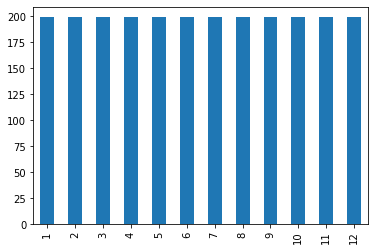

In [20]:
# Creating a visual plot to observe the y values after smote applied.
ySmote.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='specific.disorder'>

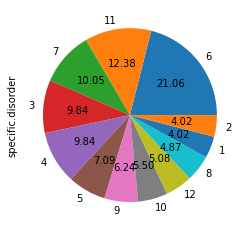

In [21]:
# Creating a visual plot to observe the unbalanced data.
eegDatasetCleaned['specific.disorder'].value_counts().plot.pie(autopct='%.2f')

In [22]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(xSmote, ySmote, test_size=0.3, random_state=42)

In [27]:
import catboost as cb
from sklearn.metrics import mean_squared_error
import optuna

def objective(trial):
    params = {
        "iterations": 1000,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "depth": trial.suggest_int("depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.05, 1.0),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 1, 100),
    }

    model = cb.CatBoostRegressor(**params, silent=True)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse = mean_squared_error(y_test, predictions, squared=False)
    return rmse

In [28]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=30)

[I 2023-08-22 16:24:47,112] A new study created in memory with name: no-name-9d725782-2fa1-494a-9d15-c08bbda4a4f1
[I 2023-08-22 16:30:32,078] Trial 0 finished with value: 1.6661739656036536 and parameters: {'learning_rate': 0.048592465336578836, 'depth': 8, 'subsample': 0.5782399047305666, 'colsample_bylevel': 0.2167159066908374, 'min_data_in_leaf': 30}. Best is trial 0 with value: 1.6661739656036536.
[I 2023-08-22 16:31:28,674] Trial 1 finished with value: 1.7569820317298732 and parameters: {'learning_rate': 0.06154022696103977, 'depth': 4, 'subsample': 0.3745860858625728, 'colsample_bylevel': 0.6668953171528305, 'min_data_in_leaf': 59}. Best is trial 0 with value: 1.6661739656036536.
[I 2023-08-22 17:03:38,439] Trial 2 finished with value: 1.7267096255372074 and parameters: {'learning_rate': 0.020017763083546834, 'depth': 9, 'subsample': 0.2867074944148372, 'colsample_bylevel': 0.8623227340170458, 'min_data_in_leaf': 47}. Best is trial 0 with value: 1.6661739656036536.
[I 2023-08-22 

[I 2023-08-22 22:01:13,484] Trial 28 finished with value: 2.1287990200509395 and parameters: {'learning_rate': 0.02628145965673663, 'depth': 3, 'subsample': 0.9557060406039802, 'colsample_bylevel': 0.12792148515439236, 'min_data_in_leaf': 80}. Best is trial 26 with value: 1.6186526214738628.
[I 2023-08-22 22:01:37,711] Trial 29 finished with value: 1.6952739373409245 and parameters: {'learning_rate': 0.05363311778254411, 'depth': 5, 'subsample': 0.8185544257536305, 'colsample_bylevel': 0.05732298973925675, 'min_data_in_leaf': 98}. Best is trial 26 with value: 1.6186526214738628.


In [30]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'learning_rate': 0.099136565876236, 'depth': 6, 'subsample': 0.9234938333580323, 'colsample_bylevel': 0.07918042160965699, 'min_data_in_leaf': 13}
Best RMSE: 1.6186526214738628
Best accuracy: 1.6186526214738628


In [35]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=1500,
                           learning_rate=0.1,
                           depth=6,
                          min_data_in_leaf=13)

In [22]:
from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn import linear_model
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from catboost import CatBoostClassifier
from matplotlib import pyplot
 
# Function to evaluate model performance with number of repeats
def evaluate_model(xSmote, ySmote, repeats):
    # Preparation for cross validation procedure
    # The splits determines how the data is split into training and testing so as this is set to 5 folds 20% will be kept for testing and 80% for training
    # The repeats is set to 10 to get 
    cv = RepeatedKFold(n_splits=5, n_repeats=repeats, random_state=42)
    
    # Issue converging with max number of iterations with link to - https://scikit-learn.org/stable/modules/preprocessing.html
    model = CatBoostClassifier(iterations=1500, learning_rate=0.1, depth=6, min_data_in_leaf=13)
   
    # Below the variable contains the results from the cross validation score and returns them to be processed further for comparison
    modelAccuracyResults = cross_val_score(model, xSmote, ySmote, scoring='accuracy', cv=cv, n_jobs=-1)
    return modelAccuracyResults
 
# Repeats contains the range of how many times I want the cross validation to complete
# The results is a list of the results retrieved from the method above
repeats = range(1,5)
results = list()

# The for loop below prints the mean average for the k fold results along with the standard error 
for r in repeats:
    # evaluate using a given number of repeats
    modelAccuracyResults = evaluate_model(xSmote, ySmote, r)
    # Prints out the mean results for the 5 k fold and the standard error rate 
    print('>%d mean=%.4f se=%.3f' % (r, mean(modelAccuracyResults), sem(modelAccuracyResults)))
    # The results get stored in a list which are then used to create a box plot to view the deviation through each set of k fold results
    results.append(modelAccuracyResults)
        
# The plot is used to visualise the variation of the results from the cross validation scoring
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

>1 mean=0.8338 se=0.004
>2 mean=0.8342 se=0.003
>3 mean=0.8353 se=0.005


KeyboardInterrupt: 

In [36]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4486441	total: 2.79s	remaining: 3h 52m 35s
1:	learn: 2.4031066	total: 5.63s	remaining: 3h 54m 43s
2:	learn: 2.3716258	total: 8.53s	remaining: 3h 56m 53s
3:	learn: 2.3392662	total: 11.4s	remaining: 3h 56m 55s
4:	learn: 2.3097967	total: 14.2s	remaining: 3h 56m 1s
5:	learn: 2.2711655	total: 17.1s	remaining: 3h 57m 11s
6:	learn: 2.2343822	total: 19.9s	remaining: 3h 57m 3s
7:	learn: 2.2118842	total: 22.8s	remaining: 3h 57m 20s
8:	learn: 2.1878442	total: 25.6s	remaining: 3h 56m 47s
9:	learn: 2.1611991	total: 28.5s	remaining: 3h 56m 37s
10:	learn: 2.1311368	total: 31.3s	remaining: 3h 56m 43s
11:	learn: 2.1075547	total: 34.2s	remaining: 3h 56m 40s
12:	learn: 2.0787683	total: 37.1s	remaining: 3h 57m 6s
13:	learn: 2.0563588	total: 39.9s	remaining: 3h 57m 7s
14:	learn: 2.0286267	total: 42.8s	remaining: 3h 57m 9s
15:	learn: 2.0092118	total: 45.7s	remaining: 3h 57m 3s
16:	learn: 1.9824101	total: 48.5s	remaining: 3h 56m 51s
17:	learn: 1.9622891	total: 51.3s	remaining: 3h 56m 51s
18:	lear

146:	learn: 0.6386138	total: 7m 55s	remaining: 4h 21m 22s
147:	learn: 0.6353916	total: 7m 58s	remaining: 4h 21m 16s
148:	learn: 0.6315679	total: 8m 5s	remaining: 4h 23m 42s
149:	learn: 0.6273190	total: 8m 9s	remaining: 4h 23m 35s
150:	learn: 0.6236102	total: 8m 12s	remaining: 4h 23m 29s
151:	learn: 0.6188437	total: 8m 15s	remaining: 4h 23m 21s
152:	learn: 0.6166816	total: 8m 18s	remaining: 4h 23m 11s
153:	learn: 0.6121271	total: 8m 21s	remaining: 4h 23m 5s
154:	learn: 0.6100369	total: 8m 24s	remaining: 4h 22m 59s
155:	learn: 0.6070264	total: 8m 27s	remaining: 4h 22m 49s
156:	learn: 0.6031144	total: 8m 30s	remaining: 4h 22m 38s
157:	learn: 0.6007447	total: 8m 38s	remaining: 4h 24m 57s
158:	learn: 0.5953253	total: 8m 41s	remaining: 4h 24m 48s
159:	learn: 0.5928146	total: 8m 44s	remaining: 4h 24m 38s
160:	learn: 0.5898578	total: 8m 48s	remaining: 4h 24m 32s
161:	learn: 0.5852395	total: 8m 51s	remaining: 4h 24m 23s
162:	learn: 0.5822034	total: 8m 54s	remaining: 4h 24m 12s
163:	learn: 0.577

287:	learn: 0.3253752	total: 15m 53s	remaining: 4h 19m 53s
288:	learn: 0.3238754	total: 15m 55s	remaining: 4h 19m 42s
289:	learn: 0.3231053	total: 16m 3s	remaining: 4h 20m 44s
290:	learn: 0.3213102	total: 16m 6s	remaining: 4h 20m 39s
291:	learn: 0.3195961	total: 16m 9s	remaining: 4h 20m 29s
292:	learn: 0.3185185	total: 16m 12s	remaining: 4h 20m 18s
293:	learn: 0.3173910	total: 16m 15s	remaining: 4h 20m 8s
294:	learn: 0.3153400	total: 16m 17s	remaining: 4h 19m 57s
295:	learn: 0.3139776	total: 16m 20s	remaining: 4h 19m 48s
296:	learn: 0.3129892	total: 16m 23s	remaining: 4h 19m 38s
297:	learn: 0.3118720	total: 16m 26s	remaining: 4h 19m 28s
298:	learn: 0.3104197	total: 16m 29s	remaining: 4h 19m 19s
299:	learn: 0.3091392	total: 16m 32s	remaining: 4h 19m 8s
300:	learn: 0.3071322	total: 16m 35s	remaining: 4h 18m 58s
301:	learn: 0.3062155	total: 16m 42s	remaining: 4h 19m 57s
302:	learn: 0.3050573	total: 16m 45s	remaining: 4h 19m 52s
303:	learn: 0.3033501	total: 16m 48s	remaining: 4h 19m 41s
30

428:	learn: 0.1916722	total: 23m 40s	remaining: 4h 12m 16s
429:	learn: 0.1913828	total: 23m 43s	remaining: 4h 12m 13s
430:	learn: 0.1907085	total: 23m 46s	remaining: 4h 12m 5s
431:	learn: 0.1901192	total: 23m 49s	remaining: 4h 11m 57s
432:	learn: 0.1897165	total: 23m 52s	remaining: 4h 11m 50s
433:	learn: 0.1893643	total: 23m 55s	remaining: 4h 11m 43s
434:	learn: 0.1884580	total: 23m 58s	remaining: 4h 11m 36s
435:	learn: 0.1880879	total: 24m 1s	remaining: 4h 11m 29s
436:	learn: 0.1873626	total: 24m 4s	remaining: 4h 11m 22s
437:	learn: 0.1868138	total: 24m 7s	remaining: 4h 11m 16s
438:	learn: 0.1864226	total: 24m 10s	remaining: 4h 11m 8s
439:	learn: 0.1859388	total: 24m 17s	remaining: 4h 11m 46s
440:	learn: 0.1854015	total: 24m 20s	remaining: 4h 11m 41s
441:	learn: 0.1850248	total: 24m 23s	remaining: 4h 11m 34s
442:	learn: 0.1843892	total: 24m 26s	remaining: 4h 11m 26s
443:	learn: 0.1835556	total: 24m 29s	remaining: 4h 11m 19s
444:	learn: 0.1825565	total: 24m 32s	remaining: 4h 11m 12s
44

570:	learn: 0.1299371	total: 31m 25s	remaining: 4h 3m 42s
571:	learn: 0.1295194	total: 31m 32s	remaining: 4h 4m 9s
572:	learn: 0.1290877	total: 31m 35s	remaining: 4h 4m 6s
573:	learn: 0.1286863	total: 31m 38s	remaining: 4h 3m 59s
574:	learn: 0.1281391	total: 31m 41s	remaining: 4h 3m 52s
575:	learn: 0.1279354	total: 31m 44s	remaining: 4h 3m 46s
576:	learn: 0.1276844	total: 31m 47s	remaining: 4h 3m 39s
577:	learn: 0.1274967	total: 31m 50s	remaining: 4h 3m 33s
578:	learn: 0.1269717	total: 31m 52s	remaining: 4h 3m 26s
579:	learn: 0.1264235	total: 31m 55s	remaining: 4h 3m 20s
580:	learn: 0.1262850	total: 31m 58s	remaining: 4h 3m 13s
581:	learn: 0.1261475	total: 32m 1s	remaining: 4h 3m 7s
582:	learn: 0.1259639	total: 32m 9s	remaining: 4h 3m 35s
583:	learn: 0.1257124	total: 32m 12s	remaining: 4h 3m 29s
584:	learn: 0.1255445	total: 32m 14s	remaining: 4h 3m 23s
585:	learn: 0.1253417	total: 32m 17s	remaining: 4h 3m 16s
586:	learn: 0.1251645	total: 32m 20s	remaining: 4h 3m 10s
587:	learn: 0.12498

712:	learn: 0.0934434	total: 39m 13s	remaining: 3h 55m 50s
713:	learn: 0.0932984	total: 39m 16s	remaining: 3h 55m 45s
714:	learn: 0.0931970	total: 39m 23s	remaining: 3h 56m 5s
715:	learn: 0.0929881	total: 39m 26s	remaining: 3h 56m 1s
716:	learn: 0.0926603	total: 39m 29s	remaining: 3h 55m 55s
717:	learn: 0.0925673	total: 39m 32s	remaining: 3h 55m 49s
718:	learn: 0.0923807	total: 39m 35s	remaining: 3h 55m 44s
719:	learn: 0.0921405	total: 39m 38s	remaining: 3h 55m 38s
720:	learn: 0.0918618	total: 39m 41s	remaining: 3h 55m 32s
721:	learn: 0.0916925	total: 39m 44s	remaining: 3h 55m 26s
722:	learn: 0.0914884	total: 39m 46s	remaining: 3h 55m 20s
723:	learn: 0.0913724	total: 39m 49s	remaining: 3h 55m 14s
724:	learn: 0.0911951	total: 39m 52s	remaining: 3h 55m 8s
725:	learn: 0.0909519	total: 40m	remaining: 3h 55m 29s
726:	learn: 0.0907274	total: 40m 3s	remaining: 3h 55m 24s
727:	learn: 0.0904723	total: 40m 5s	remaining: 3h 55m 17s
728:	learn: 0.0902100	total: 40m 8s	remaining: 3h 55m 12s
729:	le

852:	learn: 0.0702259	total: 46m 56s	remaining: 3h 48m 13s
853:	learn: 0.0701184	total: 46m 59s	remaining: 3h 48m 7s
854:	learn: 0.0699106	total: 47m 2s	remaining: 3h 48m 2s
855:	learn: 0.0697891	total: 47m 5s	remaining: 3h 47m 57s
856:	learn: 0.0697410	total: 47m 8s	remaining: 3h 47m 51s
857:	learn: 0.0696185	total: 47m 10s	remaining: 3h 47m 46s
858:	learn: 0.0694964	total: 47m 13s	remaining: 3h 47m 41s
859:	learn: 0.0694013	total: 47m 16s	remaining: 3h 47m 36s
860:	learn: 0.0693165	total: 47m 19s	remaining: 3h 47m 30s
861:	learn: 0.0692645	total: 47m 22s	remaining: 3h 47m 25s
862:	learn: 0.0691034	total: 47m 29s	remaining: 3h 47m 40s
863:	learn: 0.0689276	total: 47m 32s	remaining: 3h 47m 36s
864:	learn: 0.0687682	total: 47m 35s	remaining: 3h 47m 31s
865:	learn: 0.0686161	total: 47m 38s	remaining: 3h 47m 25s
866:	learn: 0.0685175	total: 47m 41s	remaining: 3h 47m 20s
867:	learn: 0.0684504	total: 47m 44s	remaining: 3h 47m 14s
868:	learn: 0.0682906	total: 47m 47s	remaining: 3h 47m 9s
869

993:	learn: 0.0552283	total: 54m 17s	remaining: 3h 38m 47s
994:	learn: 0.0551437	total: 54m 20s	remaining: 3h 38m 41s
995:	learn: 0.0550377	total: 54m 22s	remaining: 3h 38m 36s
996:	learn: 0.0549694	total: 54m 25s	remaining: 3h 38m 31s
997:	learn: 0.0548785	total: 54m 28s	remaining: 3h 38m 26s
998:	learn: 0.0548298	total: 54m 34s	remaining: 3h 38m 35s
999:	learn: 0.0546846	total: 54m 38s	remaining: 3h 38m 33s
1000:	learn: 0.0546353	total: 54m 41s	remaining: 3h 38m 28s
1001:	learn: 0.0545711	total: 54m 43s	remaining: 3h 38m 22s
1002:	learn: 0.0544823	total: 54m 46s	remaining: 3h 38m 17s
1003:	learn: 0.0543528	total: 54m 49s	remaining: 3h 38m 12s
1004:	learn: 0.0542919	total: 54m 52s	remaining: 3h 38m 7s
1005:	learn: 0.0542197	total: 54m 55s	remaining: 3h 38m 2s
1006:	learn: 0.0541473	total: 54m 57s	remaining: 3h 37m 56s
1007:	learn: 0.0540389	total: 55m	remaining: 3h 37m 51s
1008:	learn: 0.0539895	total: 55m 3s	remaining: 3h 37m 45s
1009:	learn: 0.0539732	total: 55m 6s	remaining: 3h 37m

1131:	learn: 0.0450765	total: 1h 1m 40s	remaining: 3h 30m 43s
1132:	learn: 0.0449930	total: 1h 1m 43s	remaining: 3h 30m 38s
1133:	learn: 0.0449048	total: 1h 1m 45s	remaining: 3h 30m 34s
1134:	learn: 0.0448365	total: 1h 1m 48s	remaining: 3h 30m 29s
1135:	learn: 0.0447801	total: 1h 1m 51s	remaining: 3h 30m 24s
1136:	learn: 0.0447488	total: 1h 1m 59s	remaining: 3h 30m 35s
1137:	learn: 0.0447013	total: 1h 2m 1s	remaining: 3h 30m 31s
1138:	learn: 0.0446417	total: 1h 2m 4s	remaining: 3h 30m 26s
1139:	learn: 0.0445757	total: 1h 2m 7s	remaining: 3h 30m 22s
1140:	learn: 0.0445242	total: 1h 2m 10s	remaining: 3h 30m 17s
1141:	learn: 0.0444663	total: 1h 2m 13s	remaining: 3h 30m 12s
1142:	learn: 0.0443847	total: 1h 2m 16s	remaining: 3h 30m 8s
1143:	learn: 0.0443598	total: 1h 2m 19s	remaining: 3h 30m 4s
1144:	learn: 0.0442869	total: 1h 2m 22s	remaining: 3h 29m 59s
1145:	learn: 0.0442233	total: 1h 2m 25s	remaining: 3h 29m 55s
1146:	learn: 0.0441721	total: 1h 2m 28s	remaining: 3h 29m 50s
1147:	learn: 

1265:	learn: 0.0377883	total: 1h 9m 1s	remaining: 3h 23m 34s
1266:	learn: 0.0377464	total: 1h 9m 4s	remaining: 3h 23m 29s
1267:	learn: 0.0376885	total: 1h 9m 7s	remaining: 3h 23m 25s
1268:	learn: 0.0376388	total: 1h 9m 14s	remaining: 3h 23m 34s
1269:	learn: 0.0375870	total: 1h 9m 17s	remaining: 3h 23m 30s
1270:	learn: 0.0375405	total: 1h 9m 20s	remaining: 3h 23m 26s
1271:	learn: 0.0374520	total: 1h 9m 23s	remaining: 3h 23m 21s
1272:	learn: 0.0374087	total: 1h 9m 26s	remaining: 3h 23m 17s
1273:	learn: 0.0373614	total: 1h 9m 29s	remaining: 3h 23m 13s
1274:	learn: 0.0373000	total: 1h 9m 31s	remaining: 3h 23m 8s
1275:	learn: 0.0372541	total: 1h 9m 34s	remaining: 3h 23m 4s
1276:	learn: 0.0372421	total: 1h 9m 37s	remaining: 3h 22m 59s
1277:	learn: 0.0371645	total: 1h 9m 40s	remaining: 3h 22m 55s
1278:	learn: 0.0371176	total: 1h 9m 43s	remaining: 3h 22m 51s
1279:	learn: 0.0371025	total: 1h 9m 50s	remaining: 3h 22m 59s
1280:	learn: 0.0370456	total: 1h 9m 53s	remaining: 3h 22m 55s
1281:	learn: 

1397:	learn: 0.0324246	total: 1h 16m 12s	remaining: 3h 16m 20s
1398:	learn: 0.0323823	total: 1h 16m 14s	remaining: 3h 16m 15s
1399:	learn: 0.0323477	total: 1h 16m 21s	remaining: 3h 16m 20s
1400:	learn: 0.0323121	total: 1h 16m 24s	remaining: 3h 16m 18s
1401:	learn: 0.0322594	total: 1h 16m 27s	remaining: 3h 16m 13s
1402:	learn: 0.0322108	total: 1h 16m 30s	remaining: 3h 16m 8s
1403:	learn: 0.0321792	total: 1h 16m 33s	remaining: 3h 16m 4s
1404:	learn: 0.0321279	total: 1h 16m 35s	remaining: 3h 15m 59s
1405:	learn: 0.0321047	total: 1h 16m 38s	remaining: 3h 15m 55s
1406:	learn: 0.0320778	total: 1h 16m 41s	remaining: 3h 15m 50s
1407:	learn: 0.0320373	total: 1h 16m 44s	remaining: 3h 15m 46s
1408:	learn: 0.0320107	total: 1h 16m 47s	remaining: 3h 15m 41s
1409:	learn: 0.0319758	total: 1h 16m 49s	remaining: 3h 15m 37s
1410:	learn: 0.0319541	total: 1h 16m 56s	remaining: 3h 15m 41s
1411:	learn: 0.0319210	total: 1h 16m 59s	remaining: 3h 15m 39s
1412:	learn: 0.0318782	total: 1h 17m 2s	remaining: 3h 15m

1529:	learn: 0.0283096	total: 1h 23m 10s	remaining: 3h 8m 38s
1530:	learn: 0.0282618	total: 1h 23m 13s	remaining: 3h 8m 33s
1531:	learn: 0.0282431	total: 1h 23m 15s	remaining: 3h 8m 29s
1532:	learn: 0.0282038	total: 1h 23m 22s	remaining: 3h 8m 34s
1533:	learn: 0.0281776	total: 1h 23m 26s	remaining: 3h 8m 31s
1534:	learn: 0.0281445	total: 1h 23m 29s	remaining: 3h 8m 26s
1535:	learn: 0.0281231	total: 1h 23m 31s	remaining: 3h 8m 22s
1536:	learn: 0.0281034	total: 1h 23m 34s	remaining: 3h 8m 18s
1537:	learn: 0.0280731	total: 1h 23m 37s	remaining: 3h 8m 14s
1538:	learn: 0.0280431	total: 1h 23m 40s	remaining: 3h 8m 9s
1539:	learn: 0.0280005	total: 1h 23m 43s	remaining: 3h 8m 5s
1540:	learn: 0.0279728	total: 1h 23m 45s	remaining: 3h 8m 1s
1541:	learn: 0.0279437	total: 1h 23m 48s	remaining: 3h 7m 56s
1542:	learn: 0.0279060	total: 1h 23m 51s	remaining: 3h 7m 52s
1543:	learn: 0.0278682	total: 1h 23m 58s	remaining: 3h 7m 57s
1544:	learn: 0.0278410	total: 1h 24m 1s	remaining: 3h 7m 54s
1545:	learn:

1663:	learn: 0.0250407	total: 1h 30m 17s	remaining: 3h 1m 1s
1664:	learn: 0.0250203	total: 1h 30m 20s	remaining: 3h 57s
1665:	learn: 0.0249964	total: 1h 30m 26s	remaining: 3h 1m
1666:	learn: 0.0249599	total: 1h 30m 30s	remaining: 3h 57s
1667:	learn: 0.0249302	total: 1h 30m 33s	remaining: 3h 53s
1668:	learn: 0.0249032	total: 1h 30m 35s	remaining: 3h 49s
1669:	learn: 0.0248678	total: 1h 30m 38s	remaining: 3h 44s
1670:	learn: 0.0248349	total: 1h 30m 41s	remaining: 3h 40s
1671:	learn: 0.0247981	total: 1h 30m 44s	remaining: 3h 36s
1672:	learn: 0.0247733	total: 1h 30m 47s	remaining: 3h 32s
1673:	learn: 0.0247479	total: 1h 30m 49s	remaining: 3h 28s
1674:	learn: 0.0247252	total: 1h 30m 52s	remaining: 3h 23s
1675:	learn: 0.0246980	total: 1h 30m 55s	remaining: 3h 19s
1676:	learn: 0.0246876	total: 1h 31m 1s	remaining: 3h 22s
1677:	learn: 0.0246763	total: 1h 31m 5s	remaining: 3h 19s
1678:	learn: 0.0246395	total: 1h 31m 8s	remaining: 3h 15s
1679:	learn: 0.0246249	total: 1h 31m 11s	remaining: 3h 11s

1796:	learn: 0.0222295	total: 1h 37m 24s	remaining: 2h 53m 37s
1797:	learn: 0.0222207	total: 1h 37m 27s	remaining: 2h 53m 33s
1798:	learn: 0.0222081	total: 1h 37m 30s	remaining: 2h 53m 29s
1799:	learn: 0.0221811	total: 1h 37m 33s	remaining: 2h 53m 25s
1800:	learn: 0.0221651	total: 1h 37m 35s	remaining: 2h 53m 21s
1801:	learn: 0.0221414	total: 1h 37m 38s	remaining: 2h 53m 17s
1802:	learn: 0.0221183	total: 1h 37m 41s	remaining: 2h 53m 13s
1803:	learn: 0.0221048	total: 1h 37m 44s	remaining: 2h 53m 9s
1804:	learn: 0.0220847	total: 1h 37m 47s	remaining: 2h 53m 5s
1805:	learn: 0.0220578	total: 1h 37m 49s	remaining: 2h 53m 1s
1806:	learn: 0.0220413	total: 1h 37m 56s	remaining: 2h 53m 3s
1807:	learn: 0.0220232	total: 1h 37m 59s	remaining: 2h 53m
1808:	learn: 0.0219984	total: 1h 38m 2s	remaining: 2h 52m 56s
1809:	learn: 0.0219666	total: 1h 38m 5s	remaining: 2h 52m 52s
1810:	learn: 0.0219525	total: 1h 38m 8s	remaining: 2h 52m 48s
1811:	learn: 0.0219337	total: 1h 38m 10s	remaining: 2h 52m 44s
181

1928:	learn: 0.0200126	total: 1h 44m 24s	remaining: 2h 46m 13s
1929:	learn: 0.0199979	total: 1h 44m 27s	remaining: 2h 46m 9s
1930:	learn: 0.0199901	total: 1h 44m 30s	remaining: 2h 46m 5s
1931:	learn: 0.0199713	total: 1h 44m 33s	remaining: 2h 46m 1s
1932:	learn: 0.0199469	total: 1h 44m 35s	remaining: 2h 45m 57s
1933:	learn: 0.0199318	total: 1h 44m 38s	remaining: 2h 45m 53s
1934:	learn: 0.0199158	total: 1h 44m 41s	remaining: 2h 45m 49s
1935:	learn: 0.0199094	total: 1h 44m 44s	remaining: 2h 45m 45s
1936:	learn: 0.0198925	total: 1h 44m 51s	remaining: 2h 45m 48s
1937:	learn: 0.0198842	total: 1h 44m 54s	remaining: 2h 45m 45s
1938:	learn: 0.0198589	total: 1h 44m 57s	remaining: 2h 45m 41s
1939:	learn: 0.0198491	total: 1h 45m	remaining: 2h 45m 37s
1940:	learn: 0.0198342	total: 1h 45m 2s	remaining: 2h 45m 33s
1941:	learn: 0.0198213	total: 1h 45m 5s	remaining: 2h 45m 29s
1942:	learn: 0.0198058	total: 1h 45m 8s	remaining: 2h 45m 25s
1943:	learn: 0.0197926	total: 1h 45m 11s	remaining: 2h 45m 21s
19

2059:	learn: 0.0182633	total: 1h 51m 22s	remaining: 2h 38m 57s
2060:	learn: 0.0182492	total: 1h 51m 25s	remaining: 2h 38m 53s
2061:	learn: 0.0182377	total: 1h 51m 28s	remaining: 2h 38m 49s
2062:	learn: 0.0182263	total: 1h 51m 31s	remaining: 2h 38m 45s
2063:	learn: 0.0182104	total: 1h 51m 33s	remaining: 2h 38m 42s
2064:	learn: 0.0182091	total: 1h 51m 40s	remaining: 2h 38m 43s
2065:	learn: 0.0182005	total: 1h 51m 44s	remaining: 2h 38m 40s
2066:	learn: 0.0181851	total: 1h 51m 47s	remaining: 2h 38m 37s
2067:	learn: 0.0181731	total: 1h 51m 49s	remaining: 2h 38m 33s
2068:	learn: 0.0181619	total: 1h 51m 52s	remaining: 2h 38m 29s
2069:	learn: 0.0181482	total: 1h 51m 55s	remaining: 2h 38m 25s
2070:	learn: 0.0181305	total: 1h 51m 58s	remaining: 2h 38m 21s
2071:	learn: 0.0181185	total: 1h 52m	remaining: 2h 38m 17s
2072:	learn: 0.0181056	total: 1h 52m 3s	remaining: 2h 38m 13s
2073:	learn: 0.0180907	total: 1h 52m 6s	remaining: 2h 38m 9s
2074:	learn: 0.0180743	total: 1h 52m 12s	remaining: 2h 38m 11s

2190:	learn: 0.0167621	total: 1h 58m 21s	remaining: 2h 31m 44s
2191:	learn: 0.0167460	total: 1h 58m 27s	remaining: 2h 31m 45s
2192:	learn: 0.0167353	total: 1h 58m 31s	remaining: 2h 31m 42s
2193:	learn: 0.0167241	total: 1h 58m 34s	remaining: 2h 31m 38s
2194:	learn: 0.0167104	total: 1h 58m 37s	remaining: 2h 31m 34s
2195:	learn: 0.0166990	total: 1h 58m 39s	remaining: 2h 31m 31s
2196:	learn: 0.0166866	total: 1h 58m 42s	remaining: 2h 31m 27s
2197:	learn: 0.0166760	total: 1h 58m 45s	remaining: 2h 31m 23s
2198:	learn: 0.0166649	total: 1h 58m 48s	remaining: 2h 31m 19s
2199:	learn: 0.0166496	total: 1h 58m 51s	remaining: 2h 31m 15s
2200:	learn: 0.0166392	total: 1h 58m 53s	remaining: 2h 31m 12s
2201:	learn: 0.0166310	total: 1h 58m 56s	remaining: 2h 31m 8s
2202:	learn: 0.0166166	total: 1h 59m 3s	remaining: 2h 31m 9s
2203:	learn: 0.0166136	total: 1h 59m 6s	remaining: 2h 31m 6s
2204:	learn: 0.0166054	total: 1h 59m 9s	remaining: 2h 31m 2s
2205:	learn: 0.0165915	total: 1h 59m 12s	remaining: 2h 30m 59s

2324:	learn: 0.0153824	total: 2h 5m 32s	remaining: 2h 24m 25s
2325:	learn: 0.0153724	total: 2h 5m 34s	remaining: 2h 24m 22s
2326:	learn: 0.0153581	total: 2h 5m 37s	remaining: 2h 24m 18s
2327:	learn: 0.0153482	total: 2h 5m 40s	remaining: 2h 24m 14s
2328:	learn: 0.0153405	total: 2h 5m 46s	remaining: 2h 24m 15s
2329:	learn: 0.0153306	total: 2h 5m 50s	remaining: 2h 24m 12s
2330:	learn: 0.0153208	total: 2h 5m 53s	remaining: 2h 24m 8s
2331:	learn: 0.0153114	total: 2h 5m 56s	remaining: 2h 24m 4s
2332:	learn: 0.0152991	total: 2h 5m 58s	remaining: 2h 24m
2333:	learn: 0.0152856	total: 2h 6m 1s	remaining: 2h 23m 57s
2334:	learn: 0.0152737	total: 2h 6m 4s	remaining: 2h 23m 53s
2335:	learn: 0.0152635	total: 2h 6m 7s	remaining: 2h 23m 49s
2336:	learn: 0.0152564	total: 2h 6m 9s	remaining: 2h 23m 45s
2337:	learn: 0.0152478	total: 2h 6m 12s	remaining: 2h 23m 42s
2338:	learn: 0.0152378	total: 2h 6m 15s	remaining: 2h 23m 38s
2339:	learn: 0.0152323	total: 2h 6m 22s	remaining: 2h 23m 39s
2340:	learn: 0.015

2457:	learn: 0.0142038	total: 2h 12m 38s	remaining: 2h 17m 10s
2458:	learn: 0.0141981	total: 2h 12m 41s	remaining: 2h 17m 7s
2459:	learn: 0.0141894	total: 2h 12m 44s	remaining: 2h 17m 3s
2460:	learn: 0.0141806	total: 2h 12m 47s	remaining: 2h 16m 59s
2461:	learn: 0.0141761	total: 2h 12m 49s	remaining: 2h 16m 55s
2462:	learn: 0.0141662	total: 2h 12m 52s	remaining: 2h 16m 52s
2463:	learn: 0.0141543	total: 2h 12m 55s	remaining: 2h 16m 48s
2464:	learn: 0.0141459	total: 2h 12m 58s	remaining: 2h 16m 44s
2465:	learn: 0.0141375	total: 2h 13m 4s	remaining: 2h 16m 44s
2466:	learn: 0.0141295	total: 2h 13m 8s	remaining: 2h 16m 41s
2467:	learn: 0.0141220	total: 2h 13m 10s	remaining: 2h 16m 38s
2468:	learn: 0.0141163	total: 2h 13m 13s	remaining: 2h 16m 34s
2469:	learn: 0.0141076	total: 2h 13m 16s	remaining: 2h 16m 30s
2470:	learn: 0.0141010	total: 2h 13m 19s	remaining: 2h 16m 26s
2471:	learn: 0.0140915	total: 2h 13m 21s	remaining: 2h 16m 23s
2472:	learn: 0.0140829	total: 2h 13m 24s	remaining: 2h 16m 

2588:	learn: 0.0132514	total: 2h 19m 38s	remaining: 2h 10m 2s
2589:	learn: 0.0132424	total: 2h 19m 41s	remaining: 2h 9m 58s
2590:	learn: 0.0132341	total: 2h 19m 43s	remaining: 2h 9m 55s
2591:	learn: 0.0132314	total: 2h 19m 50s	remaining: 2h 9m 54s
2592:	learn: 0.0132238	total: 2h 19m 54s	remaining: 2h 9m 51s
2593:	learn: 0.0132156	total: 2h 19m 56s	remaining: 2h 9m 48s
2594:	learn: 0.0132093	total: 2h 19m 59s	remaining: 2h 9m 44s
2595:	learn: 0.0132051	total: 2h 20m 2s	remaining: 2h 9m 40s
2596:	learn: 0.0131966	total: 2h 20m 5s	remaining: 2h 9m 37s
2597:	learn: 0.0131888	total: 2h 20m 7s	remaining: 2h 9m 33s
2598:	learn: 0.0131803	total: 2h 20m 10s	remaining: 2h 9m 29s
2599:	learn: 0.0131719	total: 2h 20m 13s	remaining: 2h 9m 26s
2600:	learn: 0.0131645	total: 2h 20m 16s	remaining: 2h 9m 22s
2601:	learn: 0.0131577	total: 2h 20m 18s	remaining: 2h 9m 18s
2602:	learn: 0.0131505	total: 2h 20m 25s	remaining: 2h 9m 18s
2603:	learn: 0.0131410	total: 2h 20m 28s	remaining: 2h 9m 15s
2604:	learn

2722:	learn: 0.0123563	total: 2h 26m 48s	remaining: 2h 2m 45s
2723:	learn: 0.0123517	total: 2h 26m 51s	remaining: 2h 2m 42s
2724:	learn: 0.0123449	total: 2h 26m 53s	remaining: 2h 2m 38s
2725:	learn: 0.0123380	total: 2h 26m 56s	remaining: 2h 2m 34s
2726:	learn: 0.0123321	total: 2h 26m 59s	remaining: 2h 2m 31s
2727:	learn: 0.0123283	total: 2h 27m 2s	remaining: 2h 2m 27s
2728:	learn: 0.0123218	total: 2h 27m 8s	remaining: 2h 2m 27s
2729:	learn: 0.0123184	total: 2h 27m 12s	remaining: 2h 2m 24s
2730:	learn: 0.0123116	total: 2h 27m 15s	remaining: 2h 2m 20s
2731:	learn: 0.0123056	total: 2h 27m 18s	remaining: 2h 2m 16s
2732:	learn: 0.0122963	total: 2h 27m 20s	remaining: 2h 2m 13s
2733:	learn: 0.0122916	total: 2h 27m 23s	remaining: 2h 2m 9s
2734:	learn: 0.0122870	total: 2h 27m 26s	remaining: 2h 2m 6s
2735:	learn: 0.0122770	total: 2h 27m 29s	remaining: 2h 2m 2s
2736:	learn: 0.0122732	total: 2h 27m 31s	remaining: 2h 1m 58s
2737:	learn: 0.0122714	total: 2h 27m 34s	remaining: 2h 1m 55s
2738:	learn: 

2855:	learn: 0.0115668	total: 2h 33m 52s	remaining: 1h 55m 31s
2856:	learn: 0.0115597	total: 2h 33m 59s	remaining: 1h 55m 30s
2857:	learn: 0.0115508	total: 2h 34m 2s	remaining: 1h 55m 27s
2858:	learn: 0.0115449	total: 2h 34m 5s	remaining: 1h 55m 23s
2859:	learn: 0.0115415	total: 2h 34m 8s	remaining: 1h 55m 20s
2860:	learn: 0.0115372	total: 2h 34m 11s	remaining: 1h 55m 16s
2861:	learn: 0.0115321	total: 2h 34m 13s	remaining: 1h 55m 12s
2862:	learn: 0.0115281	total: 2h 34m 16s	remaining: 1h 55m 9s
2863:	learn: 0.0115219	total: 2h 34m 19s	remaining: 1h 55m 5s
2864:	learn: 0.0115157	total: 2h 34m 22s	remaining: 1h 55m 2s
2865:	learn: 0.0115125	total: 2h 34m 25s	remaining: 1h 54m 58s
2866:	learn: 0.0115053	total: 2h 34m 27s	remaining: 1h 54m 55s
2867:	learn: 0.0114963	total: 2h 34m 34s	remaining: 1h 54m 54s
2868:	learn: 0.0114918	total: 2h 34m 37s	remaining: 1h 54m 51s
2869:	learn: 0.0114858	total: 2h 34m 40s	remaining: 1h 54m 47s
2870:	learn: 0.0114797	total: 2h 34m 43s	remaining: 1h 54m 44

2987:	learn: 0.0108834	total: 2h 41m 14s	remaining: 1h 48m 34s
2988:	learn: 0.0108794	total: 2h 41m 17s	remaining: 1h 48m 31s
2989:	learn: 0.0108744	total: 2h 41m 20s	remaining: 1h 48m 27s
2990:	learn: 0.0108704	total: 2h 41m 23s	remaining: 1h 48m 24s
2991:	learn: 0.0108656	total: 2h 41m 26s	remaining: 1h 48m 20s
2992:	learn: 0.0108594	total: 2h 41m 29s	remaining: 1h 48m 17s
2993:	learn: 0.0108549	total: 2h 41m 31s	remaining: 1h 48m 13s
2994:	learn: 0.0108476	total: 2h 41m 34s	remaining: 1h 48m 10s
2995:	learn: 0.0108427	total: 2h 41m 37s	remaining: 1h 48m 6s
2996:	learn: 0.0108373	total: 2h 41m 40s	remaining: 1h 48m 2s
2997:	learn: 0.0108349	total: 2h 41m 42s	remaining: 1h 47m 59s
2998:	learn: 0.0108307	total: 2h 41m 49s	remaining: 1h 47m 58s
2999:	learn: 0.0108289	total: 2h 41m 53s	remaining: 1h 47m 55s
3000:	learn: 0.0108264	total: 2h 41m 55s	remaining: 1h 47m 51s
3001:	learn: 0.0108223	total: 2h 41m 58s	remaining: 1h 47m 48s
3002:	learn: 0.0108165	total: 2h 42m 1s	remaining: 1h 47m

3118:	learn: 0.0102721	total: 2h 48m 14s	remaining: 1h 41m 27s
3119:	learn: 0.0102673	total: 2h 48m 17s	remaining: 1h 41m 24s
3120:	learn: 0.0102627	total: 2h 48m 20s	remaining: 1h 41m 20s
3121:	learn: 0.0102569	total: 2h 48m 23s	remaining: 1h 41m 17s
3122:	learn: 0.0102531	total: 2h 48m 25s	remaining: 1h 41m 13s
3123:	learn: 0.0102489	total: 2h 48m 28s	remaining: 1h 41m 10s
3124:	learn: 0.0102439	total: 2h 48m 31s	remaining: 1h 41m 6s
3125:	learn: 0.0102400	total: 2h 48m 34s	remaining: 1h 41m 3s
3126:	learn: 0.0102361	total: 2h 48m 40s	remaining: 1h 41m 2s
3127:	learn: 0.0102339	total: 2h 48m 44s	remaining: 1h 40m 59s
3128:	learn: 0.0102286	total: 2h 48m 47s	remaining: 1h 40m 55s
3129:	learn: 0.0102255	total: 2h 48m 50s	remaining: 1h 40m 52s
3130:	learn: 0.0102212	total: 2h 48m 52s	remaining: 1h 40m 48s
3131:	learn: 0.0102175	total: 2h 48m 55s	remaining: 1h 40m 45s
3132:	learn: 0.0102133	total: 2h 48m 58s	remaining: 1h 40m 41s
3133:	learn: 0.0102098	total: 2h 49m 1s	remaining: 1h 40m 

3249:	learn: 0.0097295	total: 2h 55m 41s	remaining: 1h 34m 36s
3250:	learn: 0.0097263	total: 2h 55m 44s	remaining: 1h 34m 32s
3251:	learn: 0.0097227	total: 2h 55m 47s	remaining: 1h 34m 29s
3252:	learn: 0.0097184	total: 2h 55m 55s	remaining: 1h 34m 28s
3253:	learn: 0.0097142	total: 2h 55m 58s	remaining: 1h 34m 25s
3254:	learn: 0.0097104	total: 2h 56m 2s	remaining: 1h 34m 22s
3255:	learn: 0.0097071	total: 2h 56m 5s	remaining: 1h 34m 18s
3256:	learn: 0.0097045	total: 2h 56m 8s	remaining: 1h 34m 15s
3257:	learn: 0.0097006	total: 2h 56m 11s	remaining: 1h 34m 12s
3258:	learn: 0.0096968	total: 2h 56m 14s	remaining: 1h 34m 8s
3259:	learn: 0.0096932	total: 2h 56m 17s	remaining: 1h 34m 5s
3260:	learn: 0.0096899	total: 2h 56m 20s	remaining: 1h 34m 2s
3261:	learn: 0.0096867	total: 2h 56m 28s	remaining: 1h 34m 1s
3262:	learn: 0.0096826	total: 2h 56m 31s	remaining: 1h 33m 58s
3263:	learn: 0.0096772	total: 2h 56m 34s	remaining: 1h 33m 54s
3264:	learn: 0.0096730	total: 2h 56m 37s	remaining: 1h 33m 51s

3382:	learn: 0.0092100	total: 3h 2m 58s	remaining: 1h 27m 27s
3383:	learn: 0.0092054	total: 3h 3m 1s	remaining: 1h 27m 24s
3384:	learn: 0.0092021	total: 3h 3m 4s	remaining: 1h 27m 20s
3385:	learn: 0.0091978	total: 3h 3m 7s	remaining: 1h 27m 17s
3386:	learn: 0.0091934	total: 3h 3m 10s	remaining: 1h 27m 13s
3387:	learn: 0.0091882	total: 3h 3m 12s	remaining: 1h 27m 10s
3388:	learn: 0.0091851	total: 3h 3m 19s	remaining: 1h 27m 8s
3389:	learn: 0.0091813	total: 3h 3m 23s	remaining: 1h 27m 5s
3390:	learn: 0.0091769	total: 3h 3m 25s	remaining: 1h 27m 2s
3391:	learn: 0.0091738	total: 3h 3m 28s	remaining: 1h 26m 58s
3392:	learn: 0.0091705	total: 3h 3m 31s	remaining: 1h 26m 55s
3393:	learn: 0.0091666	total: 3h 3m 34s	remaining: 1h 26m 51s
3394:	learn: 0.0091631	total: 3h 3m 37s	remaining: 1h 26m 48s
3395:	learn: 0.0091591	total: 3h 3m 39s	remaining: 1h 26m 44s
3396:	learn: 0.0091530	total: 3h 3m 42s	remaining: 1h 26m 41s
3397:	learn: 0.0091495	total: 3h 3m 45s	remaining: 1h 26m 38s
3398:	learn: 0

3516:	learn: 0.0087632	total: 3h 10m 11s	remaining: 1h 20m 11s
3517:	learn: 0.0087593	total: 3h 10m 14s	remaining: 1h 20m 8s
3518:	learn: 0.0087563	total: 3h 10m 17s	remaining: 1h 20m 5s
3519:	learn: 0.0087531	total: 3h 10m 20s	remaining: 1h 20m 1s
3520:	learn: 0.0087490	total: 3h 10m 22s	remaining: 1h 19m 58s
3521:	learn: 0.0087442	total: 3h 10m 25s	remaining: 1h 19m 54s
3522:	learn: 0.0087412	total: 3h 10m 28s	remaining: 1h 19m 51s
3523:	learn: 0.0087402	total: 3h 10m 31s	remaining: 1h 19m 47s
3524:	learn: 0.0087389	total: 3h 10m 33s	remaining: 1h 19m 44s
3525:	learn: 0.0087374	total: 3h 10m 40s	remaining: 1h 19m 42s
3526:	learn: 0.0087341	total: 3h 10m 43s	remaining: 1h 19m 39s
3527:	learn: 0.0087311	total: 3h 10m 46s	remaining: 1h 19m 35s
3528:	learn: 0.0087274	total: 3h 10m 49s	remaining: 1h 19m 32s
3529:	learn: 0.0087248	total: 3h 10m 52s	remaining: 1h 19m 29s
3530:	learn: 0.0087221	total: 3h 10m 55s	remaining: 1h 19m 25s
3531:	learn: 0.0087184	total: 3h 10m 57s	remaining: 1h 19m

3648:	learn: 0.0083664	total: 3h 17m 13s	remaining: 1h 13m 1s
3649:	learn: 0.0083641	total: 3h 17m 16s	remaining: 1h 12m 57s
3650:	learn: 0.0083618	total: 3h 17m 19s	remaining: 1h 12m 54s
3651:	learn: 0.0083600	total: 3h 17m 21s	remaining: 1h 12m 50s
3652:	learn: 0.0083570	total: 3h 17m 24s	remaining: 1h 12m 47s
3653:	learn: 0.0083545	total: 3h 17m 27s	remaining: 1h 12m 44s
3654:	learn: 0.0083514	total: 3h 17m 33s	remaining: 1h 12m 41s
3655:	learn: 0.0083472	total: 3h 17m 37s	remaining: 1h 12m 38s
3656:	learn: 0.0083430	total: 3h 17m 39s	remaining: 1h 12m 35s
3657:	learn: 0.0083411	total: 3h 17m 42s	remaining: 1h 12m 32s
3658:	learn: 0.0083380	total: 3h 17m 45s	remaining: 1h 12m 28s
3659:	learn: 0.0083359	total: 3h 17m 48s	remaining: 1h 12m 25s
3660:	learn: 0.0083328	total: 3h 17m 50s	remaining: 1h 12m 21s
3661:	learn: 0.0083301	total: 3h 17m 53s	remaining: 1h 12m 18s
3662:	learn: 0.0083286	total: 3h 17m 56s	remaining: 1h 12m 14s
3663:	learn: 0.0083264	total: 3h 17m 59s	remaining: 1h 1

3781:	learn: 0.0080081	total: 3h 24m 21s	remaining: 1h 5m 48s
3782:	learn: 0.0080062	total: 3h 24m 24s	remaining: 1h 5m 45s
3783:	learn: 0.0080049	total: 3h 24m 26s	remaining: 1h 5m 42s
3784:	learn: 0.0080022	total: 3h 24m 29s	remaining: 1h 5m 38s
3785:	learn: 0.0079997	total: 3h 24m 32s	remaining: 1h 5m 35s
3786:	learn: 0.0079967	total: 3h 24m 35s	remaining: 1h 5m 31s
3787:	learn: 0.0079940	total: 3h 24m 38s	remaining: 1h 5m 28s
3788:	learn: 0.0079907	total: 3h 24m 40s	remaining: 1h 5m 25s
3789:	learn: 0.0079886	total: 3h 24m 43s	remaining: 1h 5m 21s
3790:	learn: 0.0079873	total: 3h 24m 46s	remaining: 1h 5m 18s
3791:	learn: 0.0079855	total: 3h 24m 52s	remaining: 1h 5m 16s
3792:	learn: 0.0079834	total: 3h 24m 56s	remaining: 1h 5m 12s
3793:	learn: 0.0079804	total: 3h 24m 59s	remaining: 1h 5m 9s
3794:	learn: 0.0079763	total: 3h 25m 2s	remaining: 1h 5m 6s
3795:	learn: 0.0079730	total: 3h 25m 5s	remaining: 1h 5m 2s
3796:	learn: 0.0079703	total: 3h 25m 7s	remaining: 1h 4m 59s
3797:	learn: 0

3916:	learn: 0.0076471	total: 3h 31m 35s	remaining: 58m 30s
3917:	learn: 0.0076448	total: 3h 31m 38s	remaining: 58m 26s
3918:	learn: 0.0076428	total: 3h 31m 41s	remaining: 58m 23s
3919:	learn: 0.0076402	total: 3h 31m 44s	remaining: 58m 20s
3920:	learn: 0.0076376	total: 3h 31m 46s	remaining: 58m 16s
3921:	learn: 0.0076356	total: 3h 31m 49s	remaining: 58m 13s
3922:	learn: 0.0076338	total: 3h 31m 56s	remaining: 58m 11s
3923:	learn: 0.0076311	total: 3h 32m	remaining: 58m 7s
3924:	learn: 0.0076279	total: 3h 32m 2s	remaining: 58m 4s
3925:	learn: 0.0076247	total: 3h 32m 5s	remaining: 58m 1s
3926:	learn: 0.0076235	total: 3h 32m 8s	remaining: 57m 57s
3927:	learn: 0.0076192	total: 3h 32m 11s	remaining: 57m 54s
3928:	learn: 0.0076165	total: 3h 32m 13s	remaining: 57m 51s
3929:	learn: 0.0076146	total: 3h 32m 16s	remaining: 57m 47s
3930:	learn: 0.0076136	total: 3h 32m 19s	remaining: 57m 44s
3931:	learn: 0.0076104	total: 3h 32m 22s	remaining: 57m 40s
3932:	learn: 0.0076088	total: 3h 32m 28s	remaining

4054:	learn: 0.0073097	total: 3h 39m 6s	remaining: 51m 3s
4055:	learn: 0.0073068	total: 3h 39m 9s	remaining: 51m
4056:	learn: 0.0073059	total: 3h 39m 12s	remaining: 50m 57s
4057:	learn: 0.0073032	total: 3h 39m 14s	remaining: 50m 53s
4058:	learn: 0.0073006	total: 3h 39m 17s	remaining: 50m 50s
4059:	learn: 0.0072980	total: 3h 39m 20s	remaining: 50m 47s
4060:	learn: 0.0072968	total: 3h 39m 23s	remaining: 50m 43s
4061:	learn: 0.0072940	total: 3h 39m 26s	remaining: 50m 40s
4062:	learn: 0.0072917	total: 3h 39m 28s	remaining: 50m 36s
4063:	learn: 0.0072884	total: 3h 39m 35s	remaining: 50m 34s
4064:	learn: 0.0072866	total: 3h 39m 38s	remaining: 50m 31s
4065:	learn: 0.0072844	total: 3h 39m 41s	remaining: 50m 27s
4066:	learn: 0.0072824	total: 3h 39m 44s	remaining: 50m 24s
4067:	learn: 0.0072804	total: 3h 39m 47s	remaining: 50m 21s
4068:	learn: 0.0072773	total: 3h 39m 50s	remaining: 50m 18s
4069:	learn: 0.0072745	total: 3h 39m 53s	remaining: 50m 14s
4070:	learn: 0.0072727	total: 3h 39m 56s	remain

4192:	learn: 0.0070019	total: 3h 46m 32s	remaining: 43m 36s
4193:	learn: 0.0069996	total: 3h 46m 35s	remaining: 43m 32s
4194:	learn: 0.0069974	total: 3h 46m 38s	remaining: 43m 29s
4195:	learn: 0.0069966	total: 3h 46m 40s	remaining: 43m 26s
4196:	learn: 0.0069956	total: 3h 46m 47s	remaining: 43m 23s
4197:	learn: 0.0069935	total: 3h 46m 50s	remaining: 43m 20s
4198:	learn: 0.0069918	total: 3h 46m 53s	remaining: 43m 16s
4199:	learn: 0.0069912	total: 3h 46m 56s	remaining: 43m 13s
4200:	learn: 0.0069887	total: 3h 46m 59s	remaining: 43m 10s
4201:	learn: 0.0069866	total: 3h 47m 1s	remaining: 43m 6s
4202:	learn: 0.0069845	total: 3h 47m 4s	remaining: 43m 3s
4203:	learn: 0.0069826	total: 3h 47m 7s	remaining: 43m
4204:	learn: 0.0069806	total: 3h 47m 10s	remaining: 42m 56s
4205:	learn: 0.0069794	total: 3h 47m 13s	remaining: 42m 53s
4206:	learn: 0.0069770	total: 3h 47m 19s	remaining: 42m 51s
4207:	learn: 0.0069746	total: 3h 47m 23s	remaining: 42m 47s
4208:	learn: 0.0069707	total: 3h 47m 26s	remainin

4330:	learn: 0.0067323	total: 3h 53m 54s	remaining: 36m 7s
4331:	learn: 0.0067300	total: 3h 53m 56s	remaining: 36m 4s
4332:	learn: 0.0067279	total: 3h 54m 3s	remaining: 36m 1s
4333:	learn: 0.0067259	total: 3h 54m 6s	remaining: 35m 58s
4334:	learn: 0.0067250	total: 3h 54m 9s	remaining: 35m 55s
4335:	learn: 0.0067240	total: 3h 54m 12s	remaining: 35m 51s
4336:	learn: 0.0067224	total: 3h 54m 15s	remaining: 35m 48s
4337:	learn: 0.0067212	total: 3h 54m 18s	remaining: 35m 45s
4338:	learn: 0.0067194	total: 3h 54m 20s	remaining: 35m 42s
4339:	learn: 0.0067170	total: 3h 54m 23s	remaining: 35m 38s
4340:	learn: 0.0067154	total: 3h 54m 26s	remaining: 35m 35s
4341:	learn: 0.0067135	total: 3h 54m 29s	remaining: 35m 32s
4342:	learn: 0.0067122	total: 3h 54m 31s	remaining: 35m 28s
4343:	learn: 0.0067099	total: 3h 54m 38s	remaining: 35m 26s
4344:	learn: 0.0067085	total: 3h 54m 41s	remaining: 35m 22s
4345:	learn: 0.0067075	total: 3h 54m 44s	remaining: 35m 19s
4346:	learn: 0.0067054	total: 3h 54m 47s	remai

4469:	learn: 0.0064803	total: 4h 2m 11s	remaining: 28m 42s
4470:	learn: 0.0064791	total: 4h 2m 14s	remaining: 28m 39s
4471:	learn: 0.0064762	total: 4h 2m 17s	remaining: 28m 36s
4472:	learn: 0.0064744	total: 4h 2m 20s	remaining: 28m 33s
4473:	learn: 0.0064716	total: 4h 2m 23s	remaining: 28m 29s
4474:	learn: 0.0064701	total: 4h 2m 26s	remaining: 28m 26s
4475:	learn: 0.0064686	total: 4h 2m 34s	remaining: 28m 23s
4476:	learn: 0.0064667	total: 4h 2m 37s	remaining: 28m 20s
4477:	learn: 0.0064648	total: 4h 2m 41s	remaining: 28m 17s
4478:	learn: 0.0064627	total: 4h 2m 44s	remaining: 28m 14s
4479:	learn: 0.0064615	total: 4h 2m 47s	remaining: 28m 10s
4480:	learn: 0.0064597	total: 4h 2m 50s	remaining: 28m 7s
4481:	learn: 0.0064574	total: 4h 2m 53s	remaining: 28m 4s
4482:	learn: 0.0064563	total: 4h 2m 56s	remaining: 28m 1s
4483:	learn: 0.0064541	total: 4h 3m 4s	remaining: 27m 58s
4484:	learn: 0.0064521	total: 4h 3m 7s	remaining: 27m 55s
4485:	learn: 0.0064492	total: 4h 3m 10s	remaining: 27m 51s
44

4609:	learn: 0.0062310	total: 4h 10m 46s	remaining: 21m 12s
4610:	learn: 0.0062295	total: 4h 10m 50s	remaining: 21m 9s
4611:	learn: 0.0062276	total: 4h 10m 58s	remaining: 21m 6s
4612:	learn: 0.0062260	total: 4h 11m 1s	remaining: 21m 3s
4613:	learn: 0.0062240	total: 4h 11m 4s	remaining: 21m
4614:	learn: 0.0062225	total: 4h 11m 7s	remaining: 20m 56s
4615:	learn: 0.0062214	total: 4h 11m 10s	remaining: 20m 53s
4616:	learn: 0.0062195	total: 4h 11m 13s	remaining: 20m 50s
4617:	learn: 0.0062183	total: 4h 11m 16s	remaining: 20m 47s
4618:	learn: 0.0062157	total: 4h 11m 19s	remaining: 20m 43s
4619:	learn: 0.0062136	total: 4h 11m 28s	remaining: 20m 41s
4620:	learn: 0.0062121	total: 4h 11m 31s	remaining: 20m 37s
4621:	learn: 0.0062097	total: 4h 11m 34s	remaining: 20m 34s
4622:	learn: 0.0062080	total: 4h 11m 37s	remaining: 20m 31s
4623:	learn: 0.0062050	total: 4h 11m 40s	remaining: 20m 27s
4624:	learn: 0.0062025	total: 4h 11m 43s	remaining: 20m 24s
4625:	learn: 0.0062008	total: 4h 11m 46s	remaining

4747:	learn: 0.0060042	total: 4h 19m 14s	remaining: 13m 45s
4748:	learn: 0.0060026	total: 4h 19m 17s	remaining: 13m 42s
4749:	learn: 0.0060011	total: 4h 19m 20s	remaining: 13m 38s
4750:	learn: 0.0059990	total: 4h 19m 24s	remaining: 13m 35s
4751:	learn: 0.0059969	total: 4h 19m 32s	remaining: 13m 32s
4752:	learn: 0.0059961	total: 4h 19m 35s	remaining: 13m 29s
4753:	learn: 0.0059936	total: 4h 19m 38s	remaining: 13m 26s
4754:	learn: 0.0059921	total: 4h 19m 41s	remaining: 13m 22s
4755:	learn: 0.0059908	total: 4h 19m 44s	remaining: 13m 19s
4756:	learn: 0.0059888	total: 4h 19m 47s	remaining: 13m 16s
4757:	learn: 0.0059869	total: 4h 19m 50s	remaining: 13m 12s
4758:	learn: 0.0059860	total: 4h 19m 53s	remaining: 13m 9s
4759:	learn: 0.0059835	total: 4h 19m 56s	remaining: 13m 6s
4760:	learn: 0.0059817	total: 4h 20m 5s	remaining: 13m 3s
4761:	learn: 0.0059794	total: 4h 20m 8s	remaining: 13m
4762:	learn: 0.0059779	total: 4h 20m 11s	remaining: 12m 56s
4763:	learn: 0.0059764	total: 4h 20m 14s	remainin

4886:	learn: 0.0058076	total: 4h 27m 42s	remaining: 6m 11s
4887:	learn: 0.0058058	total: 4h 27m 45s	remaining: 6m 8s
4888:	learn: 0.0058045	total: 4h 27m 48s	remaining: 6m 4s
4889:	learn: 0.0058024	total: 4h 27m 51s	remaining: 6m 1s
4890:	learn: 0.0058018	total: 4h 27m 54s	remaining: 5m 58s
4891:	learn: 0.0058003	total: 4h 27m 57s	remaining: 5m 54s
4892:	learn: 0.0057993	total: 4h 28m 1s	remaining: 5m 51s
4893:	learn: 0.0057976	total: 4h 28m 9s	remaining: 5m 48s
4894:	learn: 0.0057956	total: 4h 28m 12s	remaining: 5m 45s
4895:	learn: 0.0057943	total: 4h 28m 15s	remaining: 5m 41s
4896:	learn: 0.0057926	total: 4h 28m 18s	remaining: 5m 38s
4897:	learn: 0.0057908	total: 4h 28m 21s	remaining: 5m 35s
4898:	learn: 0.0057893	total: 4h 28m 24s	remaining: 5m 32s
4899:	learn: 0.0057870	total: 4h 28m 27s	remaining: 5m 28s
4900:	learn: 0.0057854	total: 4h 28m 30s	remaining: 5m 25s
4901:	learn: 0.0057844	total: 4h 28m 33s	remaining: 5m 22s
4902:	learn: 0.0057830	total: 4h 28m 36s	remaining: 5m 18s
49

In [37]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.8298465829846583

In [38]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[11],
       [ 9],
       [ 5],
       [12],
       [10],
       [ 4],
       [ 5],
       [10],
       [ 1],
       [ 4],
       [ 4],
       [ 8],
       [11],
       [ 8],
       [ 3],
       [ 6],
       [ 5],
       [ 8],
       [11],
       [ 4],
       [ 8],
       [ 9],
       [ 1],
       [10],
       [ 2],
       [ 6],
       [ 5],
       [ 8],
       [ 3],
       [ 4],
       [10],
       [ 2],
       [ 5],
       [ 3],
       [ 8],
       [10],
       [ 3],
       [ 2],
       [11],
       [10],
       [10],
       [ 7],
       [11],
       [12],
       [ 8],
       [ 5],
       [ 9],
       [11],
       [10],
       [ 5],
       [11],
       [10],
       [ 3],
       [ 8],
       [ 1],
       [12],
       [ 9],
       [ 7],
       [ 6],
       [12],
       [ 4],
       [ 4],
       [ 2],
       [ 1],
       [ 7],
       [ 2],
       [10],
       [ 2],
       [ 7],
       [ 3],
       [ 1],
       [ 6],
       [12],
       [11],
       [ 4],
       [ 3],
       [12],

In [39]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[56,  0,  0,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 0, 55,  0,  0,  0,  0,  4,  0,  0,  0,  0,  1],
       [ 2,  0, 50,  0,  0,  1,  0,  0,  0,  0,  2,  2],
       [ 0,  0,  2, 55,  4,  3,  6,  0,  2,  0,  0,  3],
       [ 0,  0,  2,  1, 56,  0,  0,  0,  0,  0,  0,  1],
       [ 1,  3,  6,  8,  4, 21,  5,  1,  5,  2,  8,  2],
       [ 2,  0,  1,  1,  1,  1, 43,  1,  1,  1,  7,  0],
       [ 0,  0,  0,  1,  0,  0,  2, 60,  0,  0,  0,  2],
       [ 0,  0,  1,  0,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 52,  1,  0],
       [ 0,  1,  5,  1,  1,  4,  1,  0,  0,  0, 46,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  1, 50]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

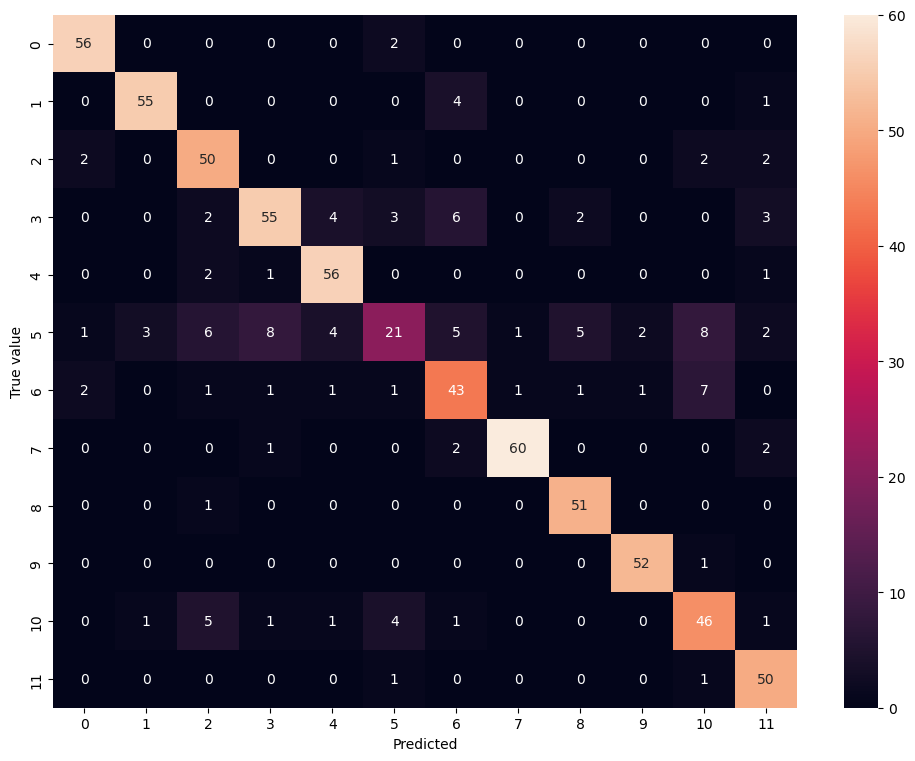

In [40]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (10,5) & (3,5) with 8,8 incorrect classifications represents how schizophrenia & behavioural with depressive disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [41]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.92      0.97      0.94        58
           2       0.93      0.92      0.92        60
           3       0.75      0.88      0.81        57
           4       0.82      0.73      0.77        75
           5       0.85      0.93      0.89        60
           6       0.64      0.32      0.42        66
           7       0.70      0.73      0.72        59
           8       0.97      0.92      0.94        65
           9       0.86      0.98      0.92        52
          10       0.95      0.98      0.96        53
          11       0.71      0.77      0.74        60
          12       0.81      0.96      0.88        52

    accuracy                           0.83       717
   macro avg       0.82      0.84      0.83       717
weighted avg       0.82      0.83      0.82       717



In [42]:
import shap
import numpy as np
from catboost import Pool

# Variable below uses SHAP API to find feature importance of Catboost model.
# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# Calculate Shap values
shap_values = explainer.shap_values(X_test)

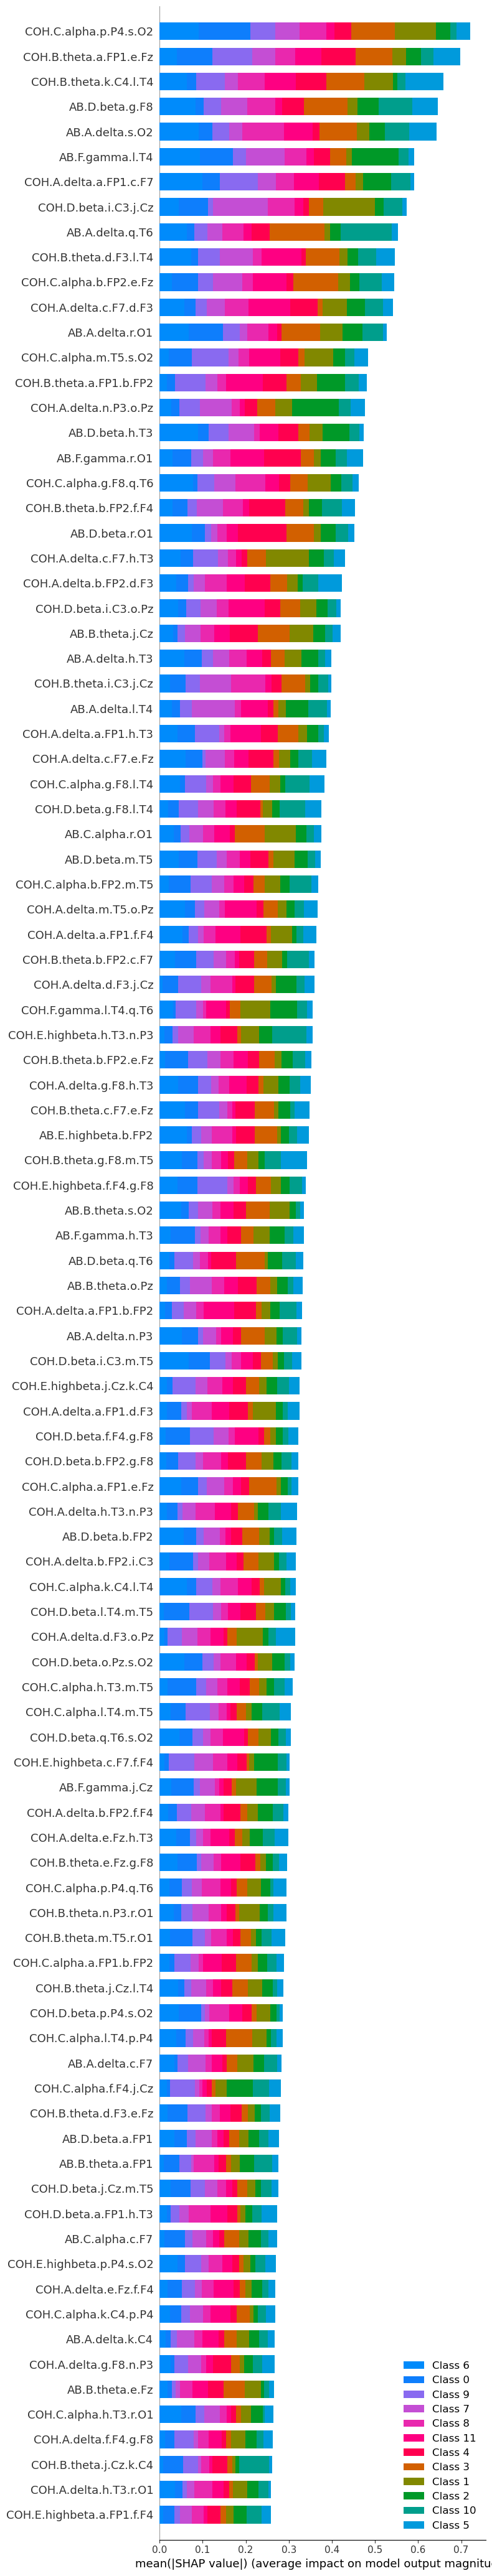

In [43]:
# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, max_display = 100)


In [44]:
# Variable below stores the values with a standard deviation of 0
vals = np.abs(shap_values).mean(0)

# Below the feature importance variable stores a data frame that takes all the features used to train the model
# and then sorts those values based on the feature importance with the most important at the top.
feature_importance = pd.DataFrame(list(zip(X_train.columns, sum(vals))), columns=['col_name','feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'], ascending=False,inplace=True)

# Printing an observation of the features and their importance in the model
feature_importance

,col_name,feature_importance_vals
623,COH.C.alpha.p.P4.s.O2,43.071227
288,COH.B.theta.a.FP1.e.Fz,41.668585
420,COH.B.theta.k.C4.l.T4,39.350290
63,AB.D.beta.g.F8,38.558372
18,AB.A.delta.s.O2,38.373245
...,...,...
874,COH.E.highbeta.e.Fz.p.P4,0.235459
876,COH.E.highbeta.e.Fz.r.O1,0.228886
931,COH.E.highbeta.j.Cz.r.O1,0.208468
1056,COH.F.gamma.f.F4.n.P3,0.077567


In [45]:
# Below I am retrieving the 100 most important features to the model to try improve
# model accuracy by ignorning redundant / non impactful features.

selectedFeaturesColumns = feature_importance.head(10)

selectedFeatureColumnsNames = selectedFeaturesColumns['col_name'].tolist()

# Printing an observation of the features and their importance in the model
selectedFeatureColumnsNames

['COH.C.alpha.p.P4.s.O2',
 'COH.B.theta.a.FP1.e.Fz',
 'COH.B.theta.k.C4.l.T4',
 'AB.D.beta.g.F8',
 'AB.A.delta.s.O2',
 'AB.F.gamma.l.T4',
 'COH.A.delta.a.FP1.c.F7',
 'COH.D.beta.i.C3.j.Cz',
 'AB.A.delta.q.T6',
 'COH.B.theta.d.F3.l.T4']

In [46]:
# The first variable contains all of our training data without the specified disorder as this would need separated for the
# training and testing split method from sklearn.

eegTrainingDataWithTopFeaturesOnly = eegTrainingDataWithOutDisorder.reindex(columns = selectedFeatureColumnsNames)
eegTrainingDataWithTopFeaturesOnly

,COH.C.alpha.p.P4.s.O2,COH.B.theta.a.FP1.e.Fz,COH.B.theta.k.C4.l.T4,AB.D.beta.g.F8,AB.A.delta.s.O2,AB.F.gamma.l.T4,COH.A.delta.a.FP1.c.F7,COH.D.beta.i.C3.j.Cz,AB.A.delta.q.T6,COH.B.theta.d.F3.l.T4
0,63.799803,84.770546,49.913305,14.294143,11.893948,11.331295,40.235120,55.189513,11.691533,14.958808
1,66.973261,83.792599,61.908412,15.926999,12.055957,3.312587,60.256175,79.916922,12.962885,21.872876
2,75.961028,78.168703,51.598336,8.722198,10.161765,2.455580,79.309590,64.753286,8.674228,7.006642
3,73.614359,73.837714,64.211776,28.274453,25.769522,5.500365,41.589723,60.386431,27.811259,27.336794
4,53.299924,81.595364,39.764975,4.123758,12.834485,1.037920,41.839478,86.396009,5.262199,33.851080
...,...,...,...,...,...,...,...,...,...,...
940,58.568431,59.982346,64.677794,12.051789,12.487389,1.726266,26.753708,78.291678,9.114000,41.038359
941,97.743704,88.799931,74.297350,7.464615,14.148625,1.692851,62.958227,83.750964,18.950095,60.358174
942,50.232586,99.778509,49.313945,5.342358,11.993932,0.805843,99.532797,61.009981,12.392778,33.862432
943,77.617881,73.317269,72.423443,7.527330,8.397872,1.371971,70.329473,83.593122,8.462857,38.940222


In [47]:
from sklearn.model_selection import train_test_split

# Setting test and training split of data. I kept 30% of the data for testing and 70% for training.
X_train, X_test, y_train, y_test = train_test_split(eegTrainingDataWithTopFeaturesOnly, eegDatasetCleaned['specific.disorder'], test_size=0.3, random_state=42)

In [48]:
from catboost import CatBoostClassifier

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=5000,
                           learning_rate=0.1,
                           depth=6,
                          min_data_in_leaf=13)

In [49]:
# Train the data by calling the fit method with the data from X axis and Y axis training dataset specified above
model.fit(X_train, y_train)

0:	learn: 2.4484844	total: 36.4ms	remaining: 3m 2s
1:	learn: 2.4122302	total: 71.8ms	remaining: 2m 59s
2:	learn: 2.3801889	total: 107ms	remaining: 2m 57s
3:	learn: 2.3545214	total: 143ms	remaining: 2m 58s
4:	learn: 2.3306596	total: 177ms	remaining: 2m 57s
5:	learn: 2.3062058	total: 216ms	remaining: 2m 59s
6:	learn: 2.2804856	total: 250ms	remaining: 2m 58s
7:	learn: 2.2555334	total: 290ms	remaining: 3m 1s
8:	learn: 2.2314249	total: 328ms	remaining: 3m 1s
9:	learn: 2.2100702	total: 362ms	remaining: 3m
10:	learn: 2.1871831	total: 398ms	remaining: 3m
11:	learn: 2.1693903	total: 434ms	remaining: 3m
12:	learn: 2.1465572	total: 471ms	remaining: 3m
13:	learn: 2.1293416	total: 505ms	remaining: 2m 59s
14:	learn: 2.1132339	total: 539ms	remaining: 2m 58s
15:	learn: 2.0939943	total: 576ms	remaining: 2m 59s
16:	learn: 2.0771518	total: 617ms	remaining: 3m
17:	learn: 2.0612952	total: 653ms	remaining: 3m
18:	learn: 2.0444985	total: 689ms	remaining: 3m
19:	learn: 2.0286209	total: 726ms	remaining: 3m
20:

162:	learn: 0.9522538	total: 6.06s	remaining: 2m 59s
163:	learn: 0.9485825	total: 6.09s	remaining: 2m 59s
164:	learn: 0.9447210	total: 6.13s	remaining: 2m 59s
165:	learn: 0.9413313	total: 6.16s	remaining: 2m 59s
166:	learn: 0.9374755	total: 6.2s	remaining: 2m 59s
167:	learn: 0.9313663	total: 6.24s	remaining: 2m 59s
168:	learn: 0.9263247	total: 6.27s	remaining: 2m 59s
169:	learn: 0.9213254	total: 6.31s	remaining: 2m 59s
170:	learn: 0.9189739	total: 6.34s	remaining: 2m 59s
171:	learn: 0.9148947	total: 6.38s	remaining: 2m 59s
172:	learn: 0.9119235	total: 6.42s	remaining: 2m 59s
173:	learn: 0.9067335	total: 6.45s	remaining: 2m 59s
174:	learn: 0.9029373	total: 6.49s	remaining: 2m 59s
175:	learn: 0.8978193	total: 6.53s	remaining: 2m 58s
176:	learn: 0.8919721	total: 6.57s	remaining: 2m 58s
177:	learn: 0.8885954	total: 6.6s	remaining: 2m 58s
178:	learn: 0.8845611	total: 6.64s	remaining: 2m 58s
179:	learn: 0.8817606	total: 6.67s	remaining: 2m 58s
180:	learn: 0.8766974	total: 6.71s	remaining: 2m

318:	learn: 0.4995682	total: 11.8s	remaining: 2m 53s
319:	learn: 0.4982939	total: 11.9s	remaining: 2m 53s
320:	learn: 0.4956126	total: 11.9s	remaining: 2m 53s
321:	learn: 0.4932882	total: 11.9s	remaining: 2m 53s
322:	learn: 0.4916466	total: 12s	remaining: 2m 53s
323:	learn: 0.4898388	total: 12s	remaining: 2m 53s
324:	learn: 0.4885777	total: 12.1s	remaining: 2m 53s
325:	learn: 0.4871653	total: 12.1s	remaining: 2m 53s
326:	learn: 0.4854213	total: 12.1s	remaining: 2m 53s
327:	learn: 0.4837321	total: 12.2s	remaining: 2m 53s
328:	learn: 0.4818962	total: 12.2s	remaining: 2m 53s
329:	learn: 0.4802223	total: 12.2s	remaining: 2m 53s
330:	learn: 0.4788431	total: 12.3s	remaining: 2m 53s
331:	learn: 0.4767405	total: 12.3s	remaining: 2m 53s
332:	learn: 0.4745020	total: 12.4s	remaining: 2m 53s
333:	learn: 0.4730197	total: 12.4s	remaining: 2m 53s
334:	learn: 0.4721447	total: 12.4s	remaining: 2m 53s
335:	learn: 0.4702166	total: 12.5s	remaining: 2m 52s
336:	learn: 0.4677979	total: 12.5s	remaining: 2m 5

479:	learn: 0.2897176	total: 17.8s	remaining: 2m 47s
480:	learn: 0.2887409	total: 17.8s	remaining: 2m 47s
481:	learn: 0.2873893	total: 17.8s	remaining: 2m 47s
482:	learn: 0.2865591	total: 17.9s	remaining: 2m 47s
483:	learn: 0.2858533	total: 17.9s	remaining: 2m 47s
484:	learn: 0.2851221	total: 17.9s	remaining: 2m 47s
485:	learn: 0.2841593	total: 18s	remaining: 2m 46s
486:	learn: 0.2836072	total: 18s	remaining: 2m 46s
487:	learn: 0.2826341	total: 18.1s	remaining: 2m 46s
488:	learn: 0.2812361	total: 18.1s	remaining: 2m 46s
489:	learn: 0.2802642	total: 18.1s	remaining: 2m 46s
490:	learn: 0.2794208	total: 18.2s	remaining: 2m 46s
491:	learn: 0.2785005	total: 18.2s	remaining: 2m 46s
492:	learn: 0.2778758	total: 18.2s	remaining: 2m 46s
493:	learn: 0.2765946	total: 18.3s	remaining: 2m 46s
494:	learn: 0.2759426	total: 18.3s	remaining: 2m 46s
495:	learn: 0.2746688	total: 18.3s	remaining: 2m 46s
496:	learn: 0.2737716	total: 18.4s	remaining: 2m 46s
497:	learn: 0.2727218	total: 18.4s	remaining: 2m 4

640:	learn: 0.1880097	total: 23.7s	remaining: 2m 41s
641:	learn: 0.1874036	total: 23.8s	remaining: 2m 41s
642:	learn: 0.1869564	total: 23.8s	remaining: 2m 41s
643:	learn: 0.1865058	total: 23.8s	remaining: 2m 41s
644:	learn: 0.1858906	total: 23.9s	remaining: 2m 41s
645:	learn: 0.1857452	total: 23.9s	remaining: 2m 41s
646:	learn: 0.1851628	total: 24s	remaining: 2m 41s
647:	learn: 0.1847847	total: 24s	remaining: 2m 41s
648:	learn: 0.1841425	total: 24s	remaining: 2m 41s
649:	learn: 0.1838689	total: 24.1s	remaining: 2m 41s
650:	learn: 0.1834845	total: 24.1s	remaining: 2m 41s
651:	learn: 0.1828646	total: 24.1s	remaining: 2m 41s
652:	learn: 0.1826375	total: 24.2s	remaining: 2m 40s
653:	learn: 0.1822950	total: 24.2s	remaining: 2m 40s
654:	learn: 0.1816759	total: 24.3s	remaining: 2m 40s
655:	learn: 0.1812809	total: 24.3s	remaining: 2m 40s
656:	learn: 0.1809642	total: 24.3s	remaining: 2m 40s
657:	learn: 0.1805673	total: 24.4s	remaining: 2m 40s
658:	learn: 0.1802497	total: 24.4s	remaining: 2m 40s

796:	learn: 0.1355692	total: 29.4s	remaining: 2m 35s
797:	learn: 0.1353641	total: 29.4s	remaining: 2m 34s
798:	learn: 0.1350766	total: 29.5s	remaining: 2m 34s
799:	learn: 0.1348190	total: 29.5s	remaining: 2m 34s
800:	learn: 0.1346193	total: 29.5s	remaining: 2m 34s
801:	learn: 0.1345234	total: 29.6s	remaining: 2m 34s
802:	learn: 0.1341591	total: 29.6s	remaining: 2m 34s
803:	learn: 0.1338637	total: 29.7s	remaining: 2m 34s
804:	learn: 0.1337121	total: 29.7s	remaining: 2m 34s
805:	learn: 0.1334807	total: 29.7s	remaining: 2m 34s
806:	learn: 0.1330763	total: 29.8s	remaining: 2m 34s
807:	learn: 0.1327757	total: 29.8s	remaining: 2m 34s
808:	learn: 0.1324647	total: 29.8s	remaining: 2m 34s
809:	learn: 0.1323595	total: 29.9s	remaining: 2m 34s
810:	learn: 0.1322491	total: 29.9s	remaining: 2m 34s
811:	learn: 0.1319338	total: 29.9s	remaining: 2m 34s
812:	learn: 0.1318299	total: 30s	remaining: 2m 34s
813:	learn: 0.1316808	total: 30s	remaining: 2m 34s
814:	learn: 0.1314414	total: 30s	remaining: 2m 34s

957:	learn: 0.1029800	total: 35.4s	remaining: 2m 29s
958:	learn: 0.1027963	total: 35.4s	remaining: 2m 29s
959:	learn: 0.1027307	total: 35.4s	remaining: 2m 29s
960:	learn: 0.1025537	total: 35.5s	remaining: 2m 29s
961:	learn: 0.1024103	total: 35.5s	remaining: 2m 28s
962:	learn: 0.1022809	total: 35.5s	remaining: 2m 28s
963:	learn: 0.1021348	total: 35.6s	remaining: 2m 28s
964:	learn: 0.1019692	total: 35.6s	remaining: 2m 28s
965:	learn: 0.1018002	total: 35.6s	remaining: 2m 28s
966:	learn: 0.1016241	total: 35.7s	remaining: 2m 28s
967:	learn: 0.1014779	total: 35.7s	remaining: 2m 28s
968:	learn: 0.1013132	total: 35.8s	remaining: 2m 28s
969:	learn: 0.1011455	total: 35.8s	remaining: 2m 28s
970:	learn: 0.1010109	total: 35.8s	remaining: 2m 28s
971:	learn: 0.1008212	total: 35.9s	remaining: 2m 28s
972:	learn: 0.1007517	total: 35.9s	remaining: 2m 28s
973:	learn: 0.1005632	total: 35.9s	remaining: 2m 28s
974:	learn: 0.1003769	total: 36s	remaining: 2m 28s
975:	learn: 0.1002814	total: 36s	remaining: 2m 2

1112:	learn: 0.0833536	total: 41s	remaining: 2m 23s
1113:	learn: 0.0832724	total: 41s	remaining: 2m 23s
1114:	learn: 0.0831103	total: 41.1s	remaining: 2m 23s
1115:	learn: 0.0830250	total: 41.1s	remaining: 2m 23s
1116:	learn: 0.0829358	total: 41.2s	remaining: 2m 23s
1117:	learn: 0.0828471	total: 41.2s	remaining: 2m 23s
1118:	learn: 0.0827379	total: 41.2s	remaining: 2m 23s
1119:	learn: 0.0826262	total: 41.3s	remaining: 2m 22s
1120:	learn: 0.0825596	total: 41.3s	remaining: 2m 22s
1121:	learn: 0.0824964	total: 41.3s	remaining: 2m 22s
1122:	learn: 0.0823853	total: 41.4s	remaining: 2m 22s
1123:	learn: 0.0823146	total: 41.4s	remaining: 2m 22s
1124:	learn: 0.0822797	total: 41.5s	remaining: 2m 22s
1125:	learn: 0.0821610	total: 41.5s	remaining: 2m 22s
1126:	learn: 0.0820848	total: 41.5s	remaining: 2m 22s
1127:	learn: 0.0819482	total: 41.6s	remaining: 2m 22s
1128:	learn: 0.0818362	total: 41.6s	remaining: 2m 22s
1129:	learn: 0.0817609	total: 41.6s	remaining: 2m 22s
1130:	learn: 0.0816383	total: 41

1266:	learn: 0.0695440	total: 46.7s	remaining: 2m 17s
1267:	learn: 0.0694524	total: 46.7s	remaining: 2m 17s
1268:	learn: 0.0693922	total: 46.8s	remaining: 2m 17s
1269:	learn: 0.0693276	total: 46.8s	remaining: 2m 17s
1270:	learn: 0.0692119	total: 46.8s	remaining: 2m 17s
1271:	learn: 0.0691344	total: 46.9s	remaining: 2m 17s
1272:	learn: 0.0690668	total: 46.9s	remaining: 2m 17s
1273:	learn: 0.0689807	total: 47s	remaining: 2m 17s
1274:	learn: 0.0688961	total: 47s	remaining: 2m 17s
1275:	learn: 0.0687870	total: 47s	remaining: 2m 17s
1276:	learn: 0.0687065	total: 47.1s	remaining: 2m 17s
1277:	learn: 0.0686002	total: 47.1s	remaining: 2m 17s
1278:	learn: 0.0685303	total: 47.1s	remaining: 2m 17s
1279:	learn: 0.0684532	total: 47.2s	remaining: 2m 17s
1280:	learn: 0.0684084	total: 47.2s	remaining: 2m 17s
1281:	learn: 0.0683572	total: 47.2s	remaining: 2m 17s
1282:	learn: 0.0682453	total: 47.3s	remaining: 2m 16s
1283:	learn: 0.0681642	total: 47.3s	remaining: 2m 16s
1284:	learn: 0.0680670	total: 47.4

1422:	learn: 0.0593021	total: 52.4s	remaining: 2m 11s
1423:	learn: 0.0592449	total: 52.4s	remaining: 2m 11s
1424:	learn: 0.0591957	total: 52.5s	remaining: 2m 11s
1425:	learn: 0.0591337	total: 52.5s	remaining: 2m 11s
1426:	learn: 0.0590598	total: 52.5s	remaining: 2m 11s
1427:	learn: 0.0590069	total: 52.6s	remaining: 2m 11s
1428:	learn: 0.0589687	total: 52.6s	remaining: 2m 11s
1429:	learn: 0.0588856	total: 52.7s	remaining: 2m 11s
1430:	learn: 0.0588467	total: 52.7s	remaining: 2m 11s
1431:	learn: 0.0587686	total: 52.7s	remaining: 2m 11s
1432:	learn: 0.0587420	total: 52.8s	remaining: 2m 11s
1433:	learn: 0.0587114	total: 52.8s	remaining: 2m 11s
1434:	learn: 0.0586560	total: 52.8s	remaining: 2m 11s
1435:	learn: 0.0585941	total: 52.9s	remaining: 2m 11s
1436:	learn: 0.0585498	total: 52.9s	remaining: 2m 11s
1437:	learn: 0.0584820	total: 53s	remaining: 2m 11s
1438:	learn: 0.0584214	total: 53s	remaining: 2m 11s
1439:	learn: 0.0583794	total: 53s	remaining: 2m 11s
1440:	learn: 0.0583243	total: 53.1

1578:	learn: 0.0512596	total: 58.1s	remaining: 2m 5s
1579:	learn: 0.0512035	total: 58.2s	remaining: 2m 5s
1580:	learn: 0.0511615	total: 58.2s	remaining: 2m 5s
1581:	learn: 0.0511233	total: 58.2s	remaining: 2m 5s
1582:	learn: 0.0510490	total: 58.3s	remaining: 2m 5s
1583:	learn: 0.0510040	total: 58.3s	remaining: 2m 5s
1584:	learn: 0.0509829	total: 58.4s	remaining: 2m 5s
1585:	learn: 0.0509405	total: 58.4s	remaining: 2m 5s
1586:	learn: 0.0509084	total: 58.4s	remaining: 2m 5s
1587:	learn: 0.0508676	total: 58.5s	remaining: 2m 5s
1588:	learn: 0.0508168	total: 58.5s	remaining: 2m 5s
1589:	learn: 0.0507650	total: 58.5s	remaining: 2m 5s
1590:	learn: 0.0507168	total: 58.6s	remaining: 2m 5s
1591:	learn: 0.0506764	total: 58.6s	remaining: 2m 5s
1592:	learn: 0.0506504	total: 58.6s	remaining: 2m 5s
1593:	learn: 0.0506034	total: 58.7s	remaining: 2m 5s
1594:	learn: 0.0505623	total: 58.7s	remaining: 2m 5s
1595:	learn: 0.0505163	total: 58.7s	remaining: 2m 5s
1596:	learn: 0.0504693	total: 58.8s	remaining:

1740:	learn: 0.0449746	total: 1m 4s	remaining: 1m 59s
1741:	learn: 0.0449207	total: 1m 4s	remaining: 1m 59s
1742:	learn: 0.0448937	total: 1m 4s	remaining: 1m 59s
1743:	learn: 0.0448715	total: 1m 4s	remaining: 1m 59s
1744:	learn: 0.0448427	total: 1m 4s	remaining: 1m 59s
1745:	learn: 0.0448062	total: 1m 4s	remaining: 1m 59s
1746:	learn: 0.0447748	total: 1m 4s	remaining: 1m 59s
1747:	learn: 0.0447304	total: 1m 4s	remaining: 1m 59s
1748:	learn: 0.0446847	total: 1m 4s	remaining: 1m 59s
1749:	learn: 0.0446545	total: 1m 4s	remaining: 1m 59s
1750:	learn: 0.0446110	total: 1m 4s	remaining: 1m 59s
1751:	learn: 0.0445764	total: 1m 4s	remaining: 1m 59s
1752:	learn: 0.0445499	total: 1m 4s	remaining: 1m 59s
1753:	learn: 0.0445142	total: 1m 4s	remaining: 1m 59s
1754:	learn: 0.0444838	total: 1m 4s	remaining: 1m 59s
1755:	learn: 0.0444531	total: 1m 4s	remaining: 1m 59s
1756:	learn: 0.0444108	total: 1m 4s	remaining: 1m 59s
1757:	learn: 0.0443898	total: 1m 4s	remaining: 1m 59s
1758:	learn: 0.0443485	total

1895:	learn: 0.0401144	total: 1m 9s	remaining: 1m 54s
1896:	learn: 0.0400835	total: 1m 9s	remaining: 1m 54s
1897:	learn: 0.0400673	total: 1m 9s	remaining: 1m 54s
1898:	learn: 0.0400292	total: 1m 9s	remaining: 1m 53s
1899:	learn: 0.0399943	total: 1m 9s	remaining: 1m 53s
1900:	learn: 0.0399806	total: 1m 9s	remaining: 1m 53s
1901:	learn: 0.0399551	total: 1m 9s	remaining: 1m 53s
1902:	learn: 0.0399447	total: 1m 9s	remaining: 1m 53s
1903:	learn: 0.0399372	total: 1m 9s	remaining: 1m 53s
1904:	learn: 0.0398910	total: 1m 10s	remaining: 1m 53s
1905:	learn: 0.0398704	total: 1m 10s	remaining: 1m 53s
1906:	learn: 0.0398350	total: 1m 10s	remaining: 1m 53s
1907:	learn: 0.0398091	total: 1m 10s	remaining: 1m 53s
1908:	learn: 0.0397794	total: 1m 10s	remaining: 1m 53s
1909:	learn: 0.0397573	total: 1m 10s	remaining: 1m 53s
1910:	learn: 0.0397263	total: 1m 10s	remaining: 1m 53s
1911:	learn: 0.0396945	total: 1m 10s	remaining: 1m 53s
1912:	learn: 0.0396715	total: 1m 10s	remaining: 1m 53s
1913:	learn: 0.0396

2046:	learn: 0.0361782	total: 1m 15s	remaining: 1m 48s
2047:	learn: 0.0361541	total: 1m 15s	remaining: 1m 48s
2048:	learn: 0.0361274	total: 1m 15s	remaining: 1m 48s
2049:	learn: 0.0361030	total: 1m 15s	remaining: 1m 48s
2050:	learn: 0.0360770	total: 1m 15s	remaining: 1m 48s
2051:	learn: 0.0360509	total: 1m 15s	remaining: 1m 48s
2052:	learn: 0.0360372	total: 1m 15s	remaining: 1m 48s
2053:	learn: 0.0360063	total: 1m 15s	remaining: 1m 48s
2054:	learn: 0.0359808	total: 1m 15s	remaining: 1m 48s
2055:	learn: 0.0359558	total: 1m 15s	remaining: 1m 48s
2056:	learn: 0.0359465	total: 1m 15s	remaining: 1m 48s
2057:	learn: 0.0359211	total: 1m 15s	remaining: 1m 48s
2058:	learn: 0.0359124	total: 1m 15s	remaining: 1m 48s
2059:	learn: 0.0358871	total: 1m 15s	remaining: 1m 48s
2060:	learn: 0.0358603	total: 1m 15s	remaining: 1m 47s
2061:	learn: 0.0358387	total: 1m 15s	remaining: 1m 47s
2062:	learn: 0.0358130	total: 1m 15s	remaining: 1m 47s
2063:	learn: 0.0357967	total: 1m 15s	remaining: 1m 47s
2064:	lear

2196:	learn: 0.0329648	total: 1m 20s	remaining: 1m 42s
2197:	learn: 0.0329446	total: 1m 20s	remaining: 1m 42s
2198:	learn: 0.0329244	total: 1m 20s	remaining: 1m 42s
2199:	learn: 0.0329040	total: 1m 20s	remaining: 1m 42s
2200:	learn: 0.0328828	total: 1m 20s	remaining: 1m 42s
2201:	learn: 0.0328669	total: 1m 20s	remaining: 1m 42s
2202:	learn: 0.0328482	total: 1m 20s	remaining: 1m 42s
2203:	learn: 0.0328266	total: 1m 20s	remaining: 1m 42s
2204:	learn: 0.0328091	total: 1m 20s	remaining: 1m 42s
2205:	learn: 0.0327909	total: 1m 20s	remaining: 1m 42s
2206:	learn: 0.0327722	total: 1m 20s	remaining: 1m 42s
2207:	learn: 0.0327599	total: 1m 21s	remaining: 1m 42s
2208:	learn: 0.0327552	total: 1m 21s	remaining: 1m 42s
2209:	learn: 0.0327352	total: 1m 21s	remaining: 1m 42s
2210:	learn: 0.0327078	total: 1m 21s	remaining: 1m 42s
2211:	learn: 0.0326934	total: 1m 21s	remaining: 1m 42s
2212:	learn: 0.0326743	total: 1m 21s	remaining: 1m 42s
2213:	learn: 0.0326585	total: 1m 21s	remaining: 1m 42s
2214:	lear

2345:	learn: 0.0303411	total: 1m 26s	remaining: 1m 37s
2346:	learn: 0.0303247	total: 1m 26s	remaining: 1m 37s
2347:	learn: 0.0303079	total: 1m 26s	remaining: 1m 37s
2348:	learn: 0.0302981	total: 1m 26s	remaining: 1m 37s
2349:	learn: 0.0302832	total: 1m 26s	remaining: 1m 37s
2350:	learn: 0.0302609	total: 1m 26s	remaining: 1m 37s
2351:	learn: 0.0302430	total: 1m 26s	remaining: 1m 37s
2352:	learn: 0.0302250	total: 1m 26s	remaining: 1m 37s
2353:	learn: 0.0302134	total: 1m 26s	remaining: 1m 37s
2354:	learn: 0.0301953	total: 1m 26s	remaining: 1m 37s
2355:	learn: 0.0301779	total: 1m 26s	remaining: 1m 37s
2356:	learn: 0.0301545	total: 1m 26s	remaining: 1m 37s
2357:	learn: 0.0301445	total: 1m 26s	remaining: 1m 36s
2358:	learn: 0.0301318	total: 1m 26s	remaining: 1m 36s
2359:	learn: 0.0301131	total: 1m 26s	remaining: 1m 36s
2360:	learn: 0.0300916	total: 1m 26s	remaining: 1m 36s
2361:	learn: 0.0300670	total: 1m 26s	remaining: 1m 36s
2362:	learn: 0.0300380	total: 1m 26s	remaining: 1m 36s
2363:	lear

2495:	learn: 0.0281267	total: 1m 31s	remaining: 1m 31s
2496:	learn: 0.0281081	total: 1m 31s	remaining: 1m 31s
2497:	learn: 0.0280911	total: 1m 31s	remaining: 1m 31s
2498:	learn: 0.0280743	total: 1m 31s	remaining: 1m 31s
2499:	learn: 0.0280620	total: 1m 31s	remaining: 1m 31s
2500:	learn: 0.0280519	total: 1m 31s	remaining: 1m 31s
2501:	learn: 0.0280372	total: 1m 31s	remaining: 1m 31s
2502:	learn: 0.0280201	total: 1m 31s	remaining: 1m 31s
2503:	learn: 0.0280055	total: 1m 31s	remaining: 1m 31s
2504:	learn: 0.0279968	total: 1m 31s	remaining: 1m 31s
2505:	learn: 0.0279838	total: 1m 31s	remaining: 1m 31s
2506:	learn: 0.0279692	total: 1m 31s	remaining: 1m 31s
2507:	learn: 0.0279588	total: 1m 31s	remaining: 1m 31s
2508:	learn: 0.0279455	total: 1m 32s	remaining: 1m 31s
2509:	learn: 0.0279330	total: 1m 32s	remaining: 1m 31s
2510:	learn: 0.0279174	total: 1m 32s	remaining: 1m 31s
2511:	learn: 0.0279096	total: 1m 32s	remaining: 1m 31s
2512:	learn: 0.0278959	total: 1m 32s	remaining: 1m 31s
2513:	lear

2644:	learn: 0.0261336	total: 1m 37s	remaining: 1m 26s
2645:	learn: 0.0261183	total: 1m 37s	remaining: 1m 26s
2646:	learn: 0.0261019	total: 1m 37s	remaining: 1m 26s
2647:	learn: 0.0260902	total: 1m 37s	remaining: 1m 26s
2648:	learn: 0.0260783	total: 1m 37s	remaining: 1m 26s
2649:	learn: 0.0260626	total: 1m 37s	remaining: 1m 26s
2650:	learn: 0.0260514	total: 1m 37s	remaining: 1m 26s
2651:	learn: 0.0260359	total: 1m 37s	remaining: 1m 26s
2652:	learn: 0.0260249	total: 1m 37s	remaining: 1m 26s
2653:	learn: 0.0260151	total: 1m 37s	remaining: 1m 26s
2654:	learn: 0.0260054	total: 1m 37s	remaining: 1m 25s
2655:	learn: 0.0259926	total: 1m 37s	remaining: 1m 25s
2656:	learn: 0.0259827	total: 1m 37s	remaining: 1m 25s
2657:	learn: 0.0259689	total: 1m 37s	remaining: 1m 25s
2658:	learn: 0.0259504	total: 1m 37s	remaining: 1m 25s
2659:	learn: 0.0259403	total: 1m 37s	remaining: 1m 25s
2660:	learn: 0.0259296	total: 1m 37s	remaining: 1m 25s
2661:	learn: 0.0259169	total: 1m 37s	remaining: 1m 25s
2662:	lear

2794:	learn: 0.0243592	total: 1m 42s	remaining: 1m 20s
2795:	learn: 0.0243515	total: 1m 42s	remaining: 1m 20s
2796:	learn: 0.0243435	total: 1m 42s	remaining: 1m 20s
2797:	learn: 0.0243316	total: 1m 42s	remaining: 1m 20s
2798:	learn: 0.0243202	total: 1m 42s	remaining: 1m 20s
2799:	learn: 0.0243097	total: 1m 42s	remaining: 1m 20s
2800:	learn: 0.0242969	total: 1m 42s	remaining: 1m 20s
2801:	learn: 0.0242911	total: 1m 42s	remaining: 1m 20s
2802:	learn: 0.0242852	total: 1m 42s	remaining: 1m 20s
2803:	learn: 0.0242739	total: 1m 42s	remaining: 1m 20s
2804:	learn: 0.0242649	total: 1m 42s	remaining: 1m 20s
2805:	learn: 0.0242534	total: 1m 42s	remaining: 1m 20s
2806:	learn: 0.0242379	total: 1m 42s	remaining: 1m 20s
2807:	learn: 0.0242285	total: 1m 42s	remaining: 1m 20s
2808:	learn: 0.0242125	total: 1m 42s	remaining: 1m 20s
2809:	learn: 0.0242033	total: 1m 42s	remaining: 1m 20s
2810:	learn: 0.0241904	total: 1m 43s	remaining: 1m 20s
2811:	learn: 0.0241834	total: 1m 43s	remaining: 1m 20s
2812:	lear

2944:	learn: 0.0228223	total: 1m 47s	remaining: 1m 15s
2945:	learn: 0.0228098	total: 1m 47s	remaining: 1m 15s
2946:	learn: 0.0228007	total: 1m 47s	remaining: 1m 15s
2947:	learn: 0.0227886	total: 1m 47s	remaining: 1m 15s
2948:	learn: 0.0227781	total: 1m 47s	remaining: 1m 15s
2949:	learn: 0.0227678	total: 1m 48s	remaining: 1m 15s
2950:	learn: 0.0227600	total: 1m 48s	remaining: 1m 15s
2951:	learn: 0.0227518	total: 1m 48s	remaining: 1m 14s
2952:	learn: 0.0227484	total: 1m 48s	remaining: 1m 14s
2953:	learn: 0.0227404	total: 1m 48s	remaining: 1m 14s
2954:	learn: 0.0227298	total: 1m 48s	remaining: 1m 14s
2955:	learn: 0.0227162	total: 1m 48s	remaining: 1m 14s
2956:	learn: 0.0227067	total: 1m 48s	remaining: 1m 14s
2957:	learn: 0.0227007	total: 1m 48s	remaining: 1m 14s
2958:	learn: 0.0226922	total: 1m 48s	remaining: 1m 14s
2959:	learn: 0.0226814	total: 1m 48s	remaining: 1m 14s
2960:	learn: 0.0226746	total: 1m 48s	remaining: 1m 14s
2961:	learn: 0.0226675	total: 1m 48s	remaining: 1m 14s
2962:	lear

3099:	learn: 0.0214217	total: 1m 53s	remaining: 1m 9s
3100:	learn: 0.0214150	total: 1m 53s	remaining: 1m 9s
3101:	learn: 0.0214053	total: 1m 53s	remaining: 1m 9s
3102:	learn: 0.0213933	total: 1m 53s	remaining: 1m 9s
3103:	learn: 0.0213885	total: 1m 53s	remaining: 1m 9s
3104:	learn: 0.0213769	total: 1m 53s	remaining: 1m 9s
3105:	learn: 0.0213685	total: 1m 53s	remaining: 1m 9s
3106:	learn: 0.0213629	total: 1m 53s	remaining: 1m 9s
3107:	learn: 0.0213545	total: 1m 53s	remaining: 1m 9s
3108:	learn: 0.0213465	total: 1m 53s	remaining: 1m 9s
3109:	learn: 0.0213402	total: 1m 53s	remaining: 1m 9s
3110:	learn: 0.0213306	total: 1m 53s	remaining: 1m 9s
3111:	learn: 0.0213202	total: 1m 53s	remaining: 1m 9s
3112:	learn: 0.0213139	total: 1m 53s	remaining: 1m 9s
3113:	learn: 0.0213034	total: 1m 54s	remaining: 1m 9s
3114:	learn: 0.0212959	total: 1m 54s	remaining: 1m 9s
3115:	learn: 0.0212890	total: 1m 54s	remaining: 1m 8s
3116:	learn: 0.0212849	total: 1m 54s	remaining: 1m 8s
3117:	learn: 0.0212788	total

3255:	learn: 0.0201768	total: 1m 59s	remaining: 1m 3s
3256:	learn: 0.0201718	total: 1m 59s	remaining: 1m 3s
3257:	learn: 0.0201627	total: 1m 59s	remaining: 1m 3s
3258:	learn: 0.0201519	total: 1m 59s	remaining: 1m 3s
3259:	learn: 0.0201442	total: 1m 59s	remaining: 1m 3s
3260:	learn: 0.0201384	total: 1m 59s	remaining: 1m 3s
3261:	learn: 0.0201330	total: 1m 59s	remaining: 1m 3s
3262:	learn: 0.0201252	total: 1m 59s	remaining: 1m 3s
3263:	learn: 0.0201163	total: 1m 59s	remaining: 1m 3s
3264:	learn: 0.0201136	total: 1m 59s	remaining: 1m 3s
3265:	learn: 0.0201041	total: 1m 59s	remaining: 1m 3s
3266:	learn: 0.0200964	total: 1m 59s	remaining: 1m 3s
3267:	learn: 0.0200883	total: 1m 59s	remaining: 1m 3s
3268:	learn: 0.0200793	total: 1m 59s	remaining: 1m 3s
3269:	learn: 0.0200740	total: 1m 59s	remaining: 1m 3s
3270:	learn: 0.0200646	total: 1m 59s	remaining: 1m 3s
3271:	learn: 0.0200595	total: 1m 59s	remaining: 1m 3s
3272:	learn: 0.0200529	total: 1m 59s	remaining: 1m 3s
3273:	learn: 0.0200432	total

3416:	learn: 0.0190233	total: 2m 4s	remaining: 57.9s
3417:	learn: 0.0190159	total: 2m 5s	remaining: 57.9s
3418:	learn: 0.0190111	total: 2m 5s	remaining: 57.8s
3419:	learn: 0.0190038	total: 2m 5s	remaining: 57.8s
3420:	learn: 0.0189967	total: 2m 5s	remaining: 57.7s
3421:	learn: 0.0189903	total: 2m 5s	remaining: 57.7s
3422:	learn: 0.0189813	total: 2m 5s	remaining: 57.7s
3423:	learn: 0.0189760	total: 2m 5s	remaining: 57.6s
3424:	learn: 0.0189684	total: 2m 5s	remaining: 57.6s
3425:	learn: 0.0189642	total: 2m 5s	remaining: 57.6s
3426:	learn: 0.0189537	total: 2m 5s	remaining: 57.5s
3427:	learn: 0.0189481	total: 2m 5s	remaining: 57.5s
3428:	learn: 0.0189422	total: 2m 5s	remaining: 57.5s
3429:	learn: 0.0189330	total: 2m 5s	remaining: 57.5s
3430:	learn: 0.0189288	total: 2m 5s	remaining: 57.5s
3431:	learn: 0.0189229	total: 2m 5s	remaining: 57.5s
3432:	learn: 0.0189154	total: 2m 5s	remaining: 57.5s
3433:	learn: 0.0189071	total: 2m 6s	remaining: 57.5s
3434:	learn: 0.0188999	total: 2m 6s	remaining:

3575:	learn: 0.0180470	total: 2m 15s	remaining: 53.9s
3576:	learn: 0.0180412	total: 2m 15s	remaining: 53.9s
3577:	learn: 0.0180380	total: 2m 15s	remaining: 53.9s
3578:	learn: 0.0180317	total: 2m 15s	remaining: 53.8s
3579:	learn: 0.0180266	total: 2m 15s	remaining: 53.8s
3580:	learn: 0.0180193	total: 2m 15s	remaining: 53.7s
3581:	learn: 0.0180111	total: 2m 15s	remaining: 53.7s
3582:	learn: 0.0180034	total: 2m 15s	remaining: 53.7s
3583:	learn: 0.0180005	total: 2m 15s	remaining: 53.6s
3584:	learn: 0.0179933	total: 2m 15s	remaining: 53.6s
3585:	learn: 0.0179865	total: 2m 15s	remaining: 53.5s
3586:	learn: 0.0179778	total: 2m 15s	remaining: 53.5s
3587:	learn: 0.0179713	total: 2m 15s	remaining: 53.5s
3588:	learn: 0.0179675	total: 2m 15s	remaining: 53.4s
3589:	learn: 0.0179622	total: 2m 15s	remaining: 53.4s
3590:	learn: 0.0179572	total: 2m 15s	remaining: 53.4s
3591:	learn: 0.0179517	total: 2m 16s	remaining: 53.3s
3592:	learn: 0.0179458	total: 2m 16s	remaining: 53.3s
3593:	learn: 0.0179386	total

3731:	learn: 0.0171535	total: 2m 21s	remaining: 47.9s
3732:	learn: 0.0171461	total: 2m 21s	remaining: 47.9s
3733:	learn: 0.0171426	total: 2m 21s	remaining: 47.8s
3734:	learn: 0.0171365	total: 2m 21s	remaining: 47.8s
3735:	learn: 0.0171319	total: 2m 21s	remaining: 47.8s
3736:	learn: 0.0171258	total: 2m 21s	remaining: 47.7s
3737:	learn: 0.0171216	total: 2m 21s	remaining: 47.7s
3738:	learn: 0.0171151	total: 2m 21s	remaining: 47.6s
3739:	learn: 0.0171097	total: 2m 21s	remaining: 47.6s
3740:	learn: 0.0171037	total: 2m 21s	remaining: 47.6s
3741:	learn: 0.0170984	total: 2m 21s	remaining: 47.5s
3742:	learn: 0.0170932	total: 2m 21s	remaining: 47.5s
3743:	learn: 0.0170877	total: 2m 21s	remaining: 47.5s
3744:	learn: 0.0170804	total: 2m 21s	remaining: 47.4s
3745:	learn: 0.0170739	total: 2m 21s	remaining: 47.4s
3746:	learn: 0.0170703	total: 2m 21s	remaining: 47.3s
3747:	learn: 0.0170648	total: 2m 21s	remaining: 47.3s
3748:	learn: 0.0170600	total: 2m 21s	remaining: 47.3s
3749:	learn: 0.0170545	total

3886:	learn: 0.0163413	total: 2m 26s	remaining: 42s
3887:	learn: 0.0163365	total: 2m 26s	remaining: 42s
3888:	learn: 0.0163308	total: 2m 26s	remaining: 41.9s
3889:	learn: 0.0163257	total: 2m 26s	remaining: 41.9s
3890:	learn: 0.0163215	total: 2m 26s	remaining: 41.8s
3891:	learn: 0.0163167	total: 2m 26s	remaining: 41.8s
3892:	learn: 0.0163116	total: 2m 26s	remaining: 41.8s
3893:	learn: 0.0163060	total: 2m 26s	remaining: 41.7s
3894:	learn: 0.0163001	total: 2m 26s	remaining: 41.7s
3895:	learn: 0.0162955	total: 2m 27s	remaining: 41.7s
3896:	learn: 0.0162910	total: 2m 27s	remaining: 41.6s
3897:	learn: 0.0162853	total: 2m 27s	remaining: 41.6s
3898:	learn: 0.0162798	total: 2m 27s	remaining: 41.5s
3899:	learn: 0.0162730	total: 2m 27s	remaining: 41.5s
3900:	learn: 0.0162664	total: 2m 27s	remaining: 41.5s
3901:	learn: 0.0162613	total: 2m 27s	remaining: 41.4s
3902:	learn: 0.0162582	total: 2m 27s	remaining: 41.4s
3903:	learn: 0.0162545	total: 2m 27s	remaining: 41.4s
3904:	learn: 0.0162532	total: 2m

4042:	learn: 0.0155971	total: 2m 32s	remaining: 36s
4043:	learn: 0.0155911	total: 2m 32s	remaining: 36s
4044:	learn: 0.0155854	total: 2m 32s	remaining: 36s
4045:	learn: 0.0155798	total: 2m 32s	remaining: 35.9s
4046:	learn: 0.0155754	total: 2m 32s	remaining: 35.9s
4047:	learn: 0.0155706	total: 2m 32s	remaining: 35.9s
4048:	learn: 0.0155669	total: 2m 32s	remaining: 35.8s
4049:	learn: 0.0155628	total: 2m 32s	remaining: 35.8s
4050:	learn: 0.0155590	total: 2m 32s	remaining: 35.7s
4051:	learn: 0.0155531	total: 2m 32s	remaining: 35.7s
4052:	learn: 0.0155494	total: 2m 32s	remaining: 35.7s
4053:	learn: 0.0155468	total: 2m 32s	remaining: 35.6s
4054:	learn: 0.0155421	total: 2m 32s	remaining: 35.6s
4055:	learn: 0.0155388	total: 2m 32s	remaining: 35.5s
4056:	learn: 0.0155345	total: 2m 32s	remaining: 35.5s
4057:	learn: 0.0155311	total: 2m 32s	remaining: 35.5s
4058:	learn: 0.0155262	total: 2m 32s	remaining: 35.4s
4059:	learn: 0.0155203	total: 2m 32s	remaining: 35.4s
4060:	learn: 0.0155140	total: 2m 3

4198:	learn: 0.0149357	total: 2m 37s	remaining: 30.1s
4199:	learn: 0.0149322	total: 2m 37s	remaining: 30.1s
4200:	learn: 0.0149285	total: 2m 37s	remaining: 30s
4201:	learn: 0.0149251	total: 2m 37s	remaining: 30s
4202:	learn: 0.0149198	total: 2m 38s	remaining: 30s
4203:	learn: 0.0149149	total: 2m 38s	remaining: 29.9s
4204:	learn: 0.0149123	total: 2m 38s	remaining: 29.9s
4205:	learn: 0.0149065	total: 2m 38s	remaining: 29.8s
4206:	learn: 0.0149024	total: 2m 38s	remaining: 29.8s
4207:	learn: 0.0149004	total: 2m 38s	remaining: 29.8s
4208:	learn: 0.0148976	total: 2m 38s	remaining: 29.7s
4209:	learn: 0.0148941	total: 2m 38s	remaining: 29.7s
4210:	learn: 0.0148917	total: 2m 38s	remaining: 29.7s
4211:	learn: 0.0148876	total: 2m 38s	remaining: 29.6s
4212:	learn: 0.0148846	total: 2m 38s	remaining: 29.6s
4213:	learn: 0.0148802	total: 2m 38s	remaining: 29.5s
4214:	learn: 0.0148760	total: 2m 38s	remaining: 29.5s
4215:	learn: 0.0148730	total: 2m 38s	remaining: 29.5s
4216:	learn: 0.0148694	total: 2m 3

4354:	learn: 0.0143170	total: 2m 43s	remaining: 24.2s
4355:	learn: 0.0143150	total: 2m 43s	remaining: 24.2s
4356:	learn: 0.0143122	total: 2m 43s	remaining: 24.1s
4357:	learn: 0.0143078	total: 2m 43s	remaining: 24.1s
4358:	learn: 0.0143040	total: 2m 43s	remaining: 24.1s
4359:	learn: 0.0142990	total: 2m 43s	remaining: 24s
4360:	learn: 0.0142955	total: 2m 43s	remaining: 24s
4361:	learn: 0.0142922	total: 2m 43s	remaining: 23.9s
4362:	learn: 0.0142893	total: 2m 43s	remaining: 23.9s
4363:	learn: 0.0142840	total: 2m 43s	remaining: 23.9s
4364:	learn: 0.0142807	total: 2m 43s	remaining: 23.8s
4365:	learn: 0.0142763	total: 2m 43s	remaining: 23.8s
4366:	learn: 0.0142713	total: 2m 43s	remaining: 23.8s
4367:	learn: 0.0142659	total: 2m 43s	remaining: 23.7s
4368:	learn: 0.0142620	total: 2m 44s	remaining: 23.7s
4369:	learn: 0.0142575	total: 2m 44s	remaining: 23.7s
4370:	learn: 0.0142537	total: 2m 44s	remaining: 23.6s
4371:	learn: 0.0142504	total: 2m 44s	remaining: 23.6s
4372:	learn: 0.0142467	total: 2m

4509:	learn: 0.0137438	total: 2m 49s	remaining: 18.4s
4510:	learn: 0.0137398	total: 2m 49s	remaining: 18.3s
4511:	learn: 0.0137384	total: 2m 49s	remaining: 18.3s
4512:	learn: 0.0137341	total: 2m 49s	remaining: 18.3s
4513:	learn: 0.0137301	total: 2m 49s	remaining: 18.2s
4514:	learn: 0.0137259	total: 2m 49s	remaining: 18.2s
4515:	learn: 0.0137212	total: 2m 49s	remaining: 18.1s
4516:	learn: 0.0137184	total: 2m 49s	remaining: 18.1s
4517:	learn: 0.0137134	total: 2m 49s	remaining: 18.1s
4518:	learn: 0.0137085	total: 2m 49s	remaining: 18s
4519:	learn: 0.0137052	total: 2m 49s	remaining: 18s
4520:	learn: 0.0137020	total: 2m 49s	remaining: 18s
4521:	learn: 0.0136988	total: 2m 49s	remaining: 17.9s
4522:	learn: 0.0136973	total: 2m 49s	remaining: 17.9s
4523:	learn: 0.0136939	total: 2m 49s	remaining: 17.8s
4524:	learn: 0.0136884	total: 2m 49s	remaining: 17.8s
4525:	learn: 0.0136863	total: 2m 49s	remaining: 17.8s
4526:	learn: 0.0136818	total: 2m 49s	remaining: 17.7s
4527:	learn: 0.0136770	total: 2m 4

4665:	learn: 0.0131969	total: 2m 54s	remaining: 12.5s
4666:	learn: 0.0131935	total: 2m 54s	remaining: 12.5s
4667:	learn: 0.0131907	total: 2m 54s	remaining: 12.4s
4668:	learn: 0.0131881	total: 2m 54s	remaining: 12.4s
4669:	learn: 0.0131842	total: 2m 54s	remaining: 12.4s
4670:	learn: 0.0131812	total: 2m 54s	remaining: 12.3s
4671:	learn: 0.0131762	total: 2m 54s	remaining: 12.3s
4672:	learn: 0.0131742	total: 2m 55s	remaining: 12.2s
4673:	learn: 0.0131718	total: 2m 55s	remaining: 12.2s
4674:	learn: 0.0131688	total: 2m 55s	remaining: 12.2s
4675:	learn: 0.0131660	total: 2m 55s	remaining: 12.1s
4676:	learn: 0.0131618	total: 2m 55s	remaining: 12.1s
4677:	learn: 0.0131584	total: 2m 55s	remaining: 12.1s
4678:	learn: 0.0131555	total: 2m 55s	remaining: 12s
4679:	learn: 0.0131515	total: 2m 55s	remaining: 12s
4680:	learn: 0.0131471	total: 2m 55s	remaining: 11.9s
4681:	learn: 0.0131449	total: 2m 55s	remaining: 11.9s
4682:	learn: 0.0131415	total: 2m 55s	remaining: 11.9s
4683:	learn: 0.0131363	total: 2m

4818:	learn: 0.0127001	total: 3m 1s	remaining: 6.8s
4819:	learn: 0.0126980	total: 3m 1s	remaining: 6.77s
4820:	learn: 0.0126949	total: 3m 1s	remaining: 6.73s
4821:	learn: 0.0126929	total: 3m 1s	remaining: 6.7s
4822:	learn: 0.0126888	total: 3m 1s	remaining: 6.66s
4823:	learn: 0.0126855	total: 3m 1s	remaining: 6.63s
4824:	learn: 0.0126815	total: 3m 1s	remaining: 6.59s
4825:	learn: 0.0126782	total: 3m 1s	remaining: 6.56s
4826:	learn: 0.0126754	total: 3m 1s	remaining: 6.52s
4827:	learn: 0.0126715	total: 3m 2s	remaining: 6.49s
4828:	learn: 0.0126679	total: 3m 2s	remaining: 6.45s
4829:	learn: 0.0126639	total: 3m 2s	remaining: 6.41s
4830:	learn: 0.0126607	total: 3m 2s	remaining: 6.38s
4831:	learn: 0.0126589	total: 3m 2s	remaining: 6.34s
4832:	learn: 0.0126562	total: 3m 2s	remaining: 6.31s
4833:	learn: 0.0126529	total: 3m 2s	remaining: 6.27s
4834:	learn: 0.0126502	total: 3m 2s	remaining: 6.24s
4835:	learn: 0.0126472	total: 3m 2s	remaining: 6.2s
4836:	learn: 0.0126439	total: 3m 2s	remaining: 6.

4973:	learn: 0.0122358	total: 3m 10s	remaining: 997ms
4974:	learn: 0.0122330	total: 3m 10s	remaining: 959ms
4975:	learn: 0.0122306	total: 3m 10s	remaining: 920ms
4976:	learn: 0.0122269	total: 3m 10s	remaining: 882ms
4977:	learn: 0.0122227	total: 3m 10s	remaining: 843ms
4978:	learn: 0.0122185	total: 3m 10s	remaining: 805ms
4979:	learn: 0.0122159	total: 3m 10s	remaining: 767ms
4980:	learn: 0.0122140	total: 3m 10s	remaining: 728ms
4981:	learn: 0.0122094	total: 3m 10s	remaining: 690ms
4982:	learn: 0.0122068	total: 3m 11s	remaining: 652ms
4983:	learn: 0.0122043	total: 3m 11s	remaining: 613ms
4984:	learn: 0.0121995	total: 3m 11s	remaining: 575ms
4985:	learn: 0.0121970	total: 3m 11s	remaining: 537ms
4986:	learn: 0.0121941	total: 3m 11s	remaining: 498ms
4987:	learn: 0.0121919	total: 3m 11s	remaining: 460ms
4988:	learn: 0.0121883	total: 3m 11s	remaining: 422ms
4989:	learn: 0.0121853	total: 3m 11s	remaining: 383ms
4990:	learn: 0.0121825	total: 3m 11s	remaining: 345ms
4991:	learn: 0.0121799	total

In [50]:
# Method below measures the score of model aka the models accuracy against the reserved X test and Y test data which at this
# point is unseen to the model.
# Using the X test it will calculate the Y predicted against the real predicted value which is the data stored in Y test.
model.score(X_test, y_test)

0.20774647887323944

In [51]:
# With the model accuracy tested I want to make an actual prediction with the method below.
model.predict(X_test)

array([[ 4],
       [ 6],
       [ 4],
       [11],
       [ 6],
       [ 1],
       [10],
       [ 7],
       [ 6],
       [ 3],
       [11],
       [11],
       [ 6],
       [ 3],
       [ 3],
       [ 3],
       [ 8],
       [ 6],
       [ 9],
       [ 7],
       [ 5],
       [12],
       [ 9],
       [11],
       [ 4],
       [ 6],
       [ 3],
       [ 6],
       [ 1],
       [ 1],
       [ 6],
       [ 4],
       [ 6],
       [ 6],
       [ 3],
       [ 7],
       [ 7],
       [ 4],
       [ 4],
       [ 4],
       [ 3],
       [ 6],
       [ 6],
       [11],
       [12],
       [ 6],
       [ 6],
       [ 6],
       [ 4],
       [ 3],
       [ 6],
       [11],
       [ 3],
       [ 6],
       [ 6],
       [ 6],
       [11],
       [ 8],
       [ 8],
       [ 4],
       [12],
       [ 7],
       [ 6],
       [ 6],
       [ 6],
       [ 4],
       [ 3],
       [ 6],
       [12],
       [ 1],
       [ 8],
       [ 6],
       [ 6],
       [ 4],
       [ 6],
       [ 3],
       [ 3],

In [52]:
from sklearn.metrics import confusion_matrix

# To observe the overall accuracy of the model with visualisation is to use a confusion matrix.
# To begin I retrieve the predicted values from the model prediction code and next I develop a confusion matrix with the data
# from the y testing set and the y predicted set (predicted results of model). 
# The confusion matrix will then produce a 2 * 2 dimensional array which I use to visualise with a seaborn plot. 

y_predicted = model.predict(X_test)
confusionMatrix = confusion_matrix(y_test, y_predicted)
confusionMatrix

array([[ 1,  0,  2,  3,  0,  3,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  2,  1,  4,  1,  0,  2,  1,  2,  0],
       [ 2,  0,  3,  4,  0,  7,  3,  1,  1,  2,  2,  0],
       [ 1,  0,  0,  7,  2,  9,  4,  0,  0,  0,  1,  2],
       [ 0,  0,  1,  9,  0,  9,  1,  1,  1,  2,  1,  3],
       [ 0,  0,  7,  8,  2, 24,  7,  1,  1,  1,  9,  1],
       [ 0,  0,  2,  3,  1,  6, 10,  4,  1,  0,  3,  1],
       [ 0,  0,  1,  2,  0,  3,  1,  3,  0,  1,  1,  0],
       [ 0,  0,  6,  1,  0,  5,  3,  1,  0,  0,  2,  1],
       [ 1,  0,  4,  0,  0,  5,  0,  1,  0,  0,  0,  0],
       [ 1,  0,  4,  4,  0,  8,  3,  2,  2,  1,  9,  0],
       [ 0,  0,  2,  4,  0,  3,  1,  0,  1,  0,  1,  2]], dtype=int64)

Text(120.72222222222221, 0.5, 'True value')

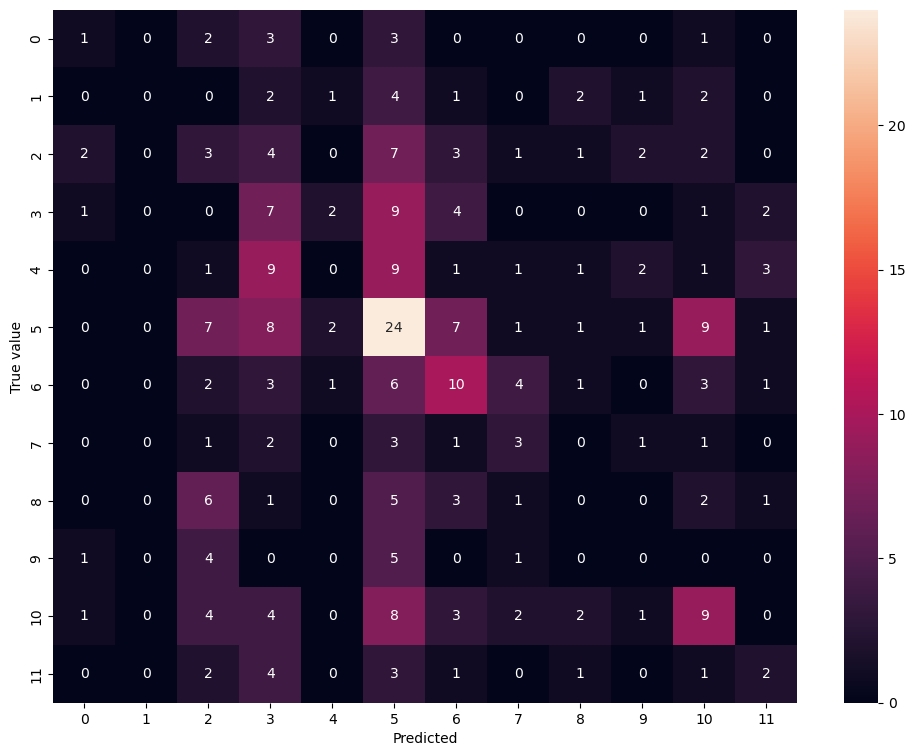

In [53]:
import seaborn as sn
from matplotlib import pyplot as plt

# The plot below is used to visualise the confusion matrix .
# The confusion matrix looks at the following 4 outcomes when processing predictions:
# - True Positive  = A sample belonging to the positive class being classified correctly
# - True Negative = A sample belonging to the negative class being classified correctly.
# - False Positve = A sample belonging to the negative class but being classified wrongly as belonging to the positive class.
# - False  Negative = A sample belonging to the positive class but being classified wrongly as belonging to the negative class.
# In the confusion matrix columns are made of true data and rows are made of predicted data.
# The center diagonal split of the data from (0,0),(1,1),(2,2)... (11,11) represent the counts of correct predictions.
# Cells with a 0 figure represent classifications with no error.
# (5,4) & (5,3) with 10,10 incorrect classifications represents how bipolar & behavioural with depressive disorders were misclassified often.
# From further observations depressive disorder was incorrectly classified on multiple occasions

plt.figure(figsize = (12,9))
sn.heatmap(confusionMatrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True value')

In [54]:
from sklearn.metrics import classification_report

# Evaluation Metrics
# Accuracy: the proportion of the total number of predictions that were correct.
# Precision: the proportion of positive cases that were correctly identified.
# Sensitivity or Recall : the proportion of actual positive cases which are correctly identified.
# F1 Score: The F1 score can be interpreted as a harmonic mean of the precision and recall
# F1 Score = 2 * (precision * recall) / (precision + recall)

print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           1       0.17      0.10      0.12        10
           2       0.00      0.00      0.00        13
           3       0.09      0.12      0.11        25
           4       0.15      0.27      0.19        26
           5       0.00      0.00      0.00        28
           6       0.28      0.39      0.33        61
           7       0.29      0.32      0.31        31
           8       0.21      0.25      0.23        12
           9       0.00      0.00      0.00        19
          10       0.00      0.00      0.00        11
          11       0.28      0.26      0.27        34
          12       0.20      0.14      0.17        14

    accuracy                           0.21       284
   macro avg       0.14      0.16      0.14       284
weighted avg       0.17      0.21      0.19       284



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [49]:
# Sources used to help develop the code.

# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a
# https://datagy.io/python-optuna/
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Census%20income%20classification%20with%20scikit-learn.html
# https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/model_agnostic/Iris%20classification%20with%20scikit-learn.html
# https://medium.com/mlearning-ai/multiclass-classification-with-auto-tuning-catboost-5d352e30778d
# https://forecastegy.com/posts/catboost-hyperparameter-tuning-guide-with-optuna/
# https://github.com/optuna/optuna-examples/blob/main/xgboost/xgboost_simple.py
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://towardsdatascience.com/kmeans-hyper-parameters-explained-with-examples-c93505820cd3
# https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html
# https://pub.aimind.so/hyperparameter-optimization-of-random-forest-model-using-optuna-for-a-regression-problem-6f49d9b520b7
# https://forecastegy.com/posts/how-to-use-optuna-to-tune-lightgbm-hyperparameters/
# https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
# https://drbeane.github.io/python_ml/pages/autosearch.html
# https://www.kaggle.com/code/dansbecker/shap-values
# https://www.google.com/search?q=..mean%280%29&sca_esv=556524961&sxsrf=AB5stBiz1lOvo0OlZAudc68UXxA6dpZvbQ%3A1691933544678&ei=aNvYZJSIKZaGxc8P37S-iAE&ved=0ahUKEwiU3KfP39mAAxUWQ_EDHV-aDxEQ4dUDCBA&uact=5&oq=..mean%280%29&gs_lp=Egxnd3Mtd2l6LXNlcnAiCS4ubWVhbigwKTIEEAAYHjIEEAAYHjIEEAAYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeMgYQABgIGB4yBhAAGAgYHjIGEAAYCBgeSLUpUABYoidwAngAkAEAmAF6oAGVCKoBAzYuNbgBA8gBAPgBAcICCBAAGIAEGLEDwgIFEAAYgATCAgsQABiABBixAxiDAcICBRAuGIAEwgIUEC4YgAQYlwUY3AQY3gQY4ATYAQHCAgoQLhgeGMcBGNEDwgIHEAAYHhjJA8ICCBAAGIoFGJIDwgIGEAAYHhgKwgIHEAAYHhjxBMICBhAAGB4YD8ICCBAAGAUYHhgKwgIGEAAYBRgewgIIEAAYCBgeGA_iAwQYACBBiAYBugYGCAEQARgU&sclient=gws-wiz-serp
# https://numpy.org/doc/stable/reference/generated/numpy.absolute.html
# https://github.com/shap/shap/issues/632
# https://stackoverflow.com/questions/57400492/select-columns-of-pandas-dataframe-if-name-is-in-list-or-create-default-and-dro
# https://stackoverflow.com/questions/45739427/dataframe-keep-only-one-column
# https://github.com/catboost/catboost/blob/master/catboost/tutorials/model_analysis/shap_values_tutorial.ipynb
# https://www.analyseup.com/python-machine-learning/catboost-python-tutorial.html